In [1]:
import torch as th
import torchvision as tv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds_train = tv.datasets.MNIST(root='.', download=True)
ds_test = tv.datasets.MNIST(root='.', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [3]:
np_x_train = np.array([np.array(x[0]) for x in ds_train])
np_x_test = np.array([np.array(x[0]) for x in ds_test])
np_x_train = np_x_train / 255.
np_x_test = np_x_test / 255.

# re-prep the datasets
ds_train = th.utils.data.TensorDataset(th.tensor(np_x_train.reshape(-1,28*28), device=th.device('cuda'), dtype=th.float32))
ds_test = th.utils.data.TensorDataset(th.tensor(np_x_test.reshape(-1,28*28), device=th.device('cuda'), dtype=th.float32))

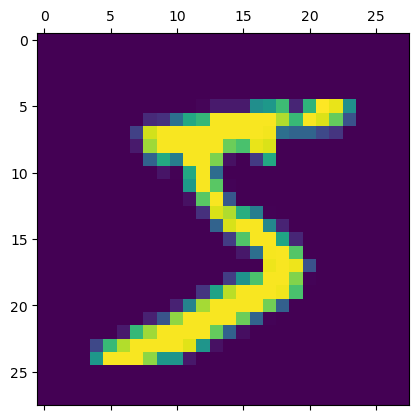

In [4]:
BATCH_SIZE = 1024
dl = th.utils.data.DataLoader(ds_train, batch_size=BATCH_SIZE)
dl_test = th.utils.data.DataLoader(ds_test, batch_size=16)
for x, in dl:
    break
plt.matshow(x[0].cpu().numpy().reshape(28,28))
x.shape
for th_x_test, in dl_test:
    break

In [37]:
def th_eval_gan(painter_model, latent_dim=128):
    painter_model.eval()

    with th.no_grad():
        th_sample = th.rand(16, latent_dim).cuda()
        th_yh= painter_model(th_sample)
    plt.figure()
    pred_grid = tv.utils.make_grid(th_yh.view(16,1,28,28), nrow=4)
    np_pred_img = pred_grid.cpu().numpy().transpose(1,2,0)    
    plt.imshow(np_pred_img)
    plt.show()
    painter_model.train()

In [45]:
class Painter(th.nn.Module):
    def __init__(self, input_shape, output_shape, lst_layers):
        super().__init__()
        # 128 -> 28x28
        current_input = input_shape
        
        self.layers = th.nn.ModuleList()
        
        for layer in lst_layers:
            self.layers.append(th.nn.Linear(current_input, layer))
            self.layers.append(th.nn.ReLU())
            
            current_input = layer
        
        self.readout = th.nn.Linear(current_input, output_shape)
        
        ## Razvan
        self.readout_activation = th.nn.Tanh()
        #self.readout_activation = th.nn.Sigmoid()
        return
        
    def forward(self, th_seed):
        # seed.shape = (bs, 128)
        th_x = th_seed
        for layer in self.layers:
            th_x = layer(th_x)
            
        logits = self.readout(th_x)
        return self.readout_activation(logits)
        

In [8]:
class Teacher(th.nn.Module):
    def __init__(self, input_shape, lst_layers, dropout):
        super().__init__()
        current_input = input_shape
        
        self.layers = th.nn.ModuleList()
        
        for layer in lst_layers:
            self.layers.append(th.nn.Linear(current_input, layer))
            self.layers.append(th.nn.ReLU())
            self.layers.append(th.nn.Dropout(p=dropout))
            current_input = layer
            
        self.readout = th.nn.Linear(current_input, 1)
        self.readout_activation = th.nn.Sigmoid()
        return
    
    def forward(self, th_x):
        for layer in self.layers:
            th_x = layer(th_x)
            
        logits = self.readout(th_x)
        return self.readout_activation(logits)

Training epoch 1/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6499671339988708, painter_err: 15.932640075683594


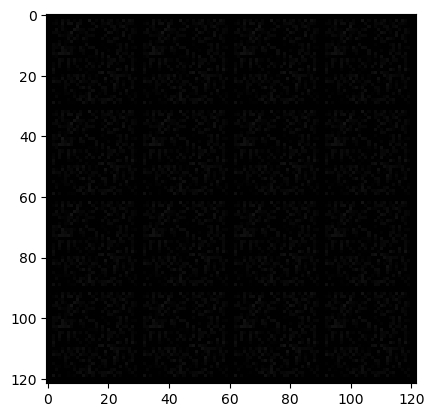

Training epoch 2/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6848511099815369, painter_err: 0.564033031463623


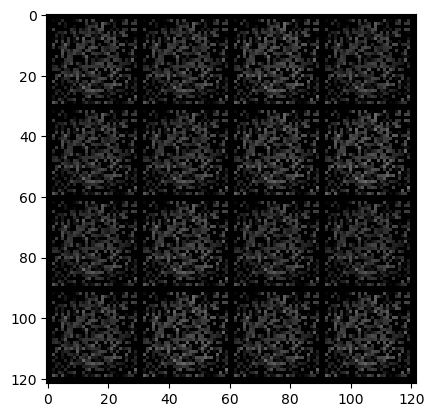

Training epoch 3/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.8268564939498901, painter_err: 0.4304356873035431


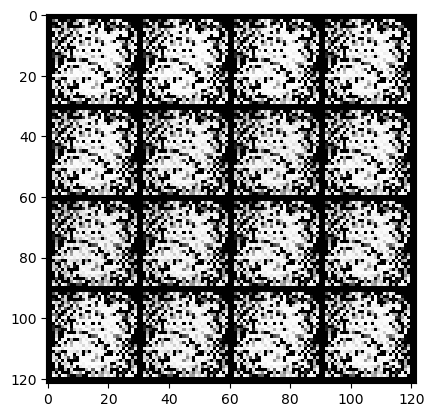

Training epoch 4/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6298660635948181, painter_err: 0.7658275961875916


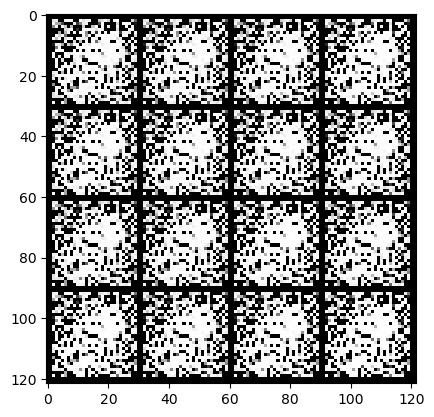

Training epoch 5/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6171467304229736, painter_err: 0.7947655916213989


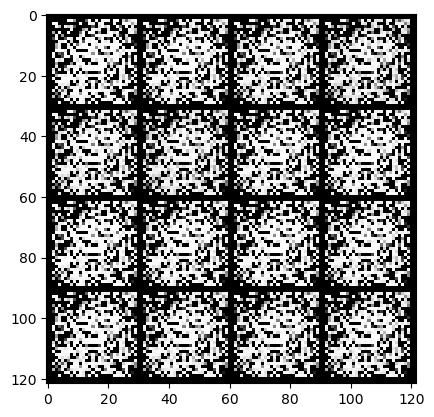

Training epoch 6/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7444521188735962, painter_err: 0.5689070820808411


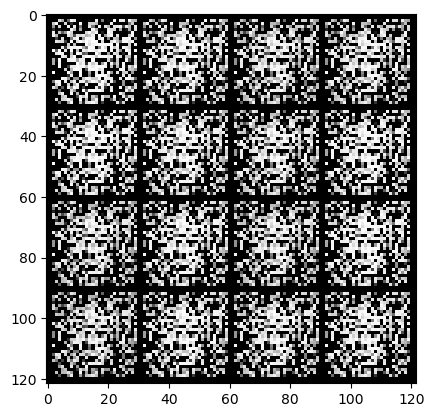

Training epoch 7/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7908775806427002, painter_err: 0.5218416452407837


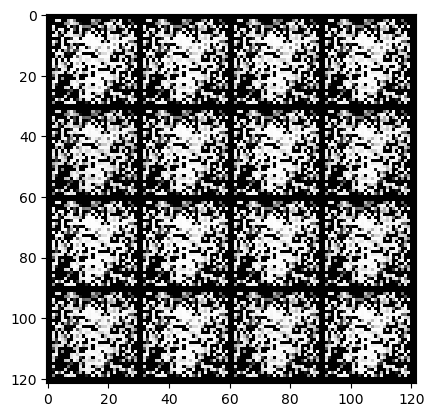

Training epoch 8/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7022759914398193, painter_err: 0.7188482880592346


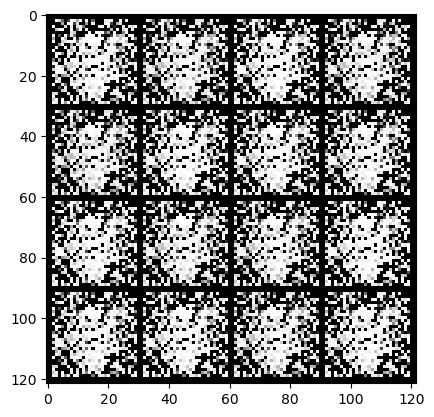

Training epoch 9/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7274590134620667, painter_err: 0.6958432793617249


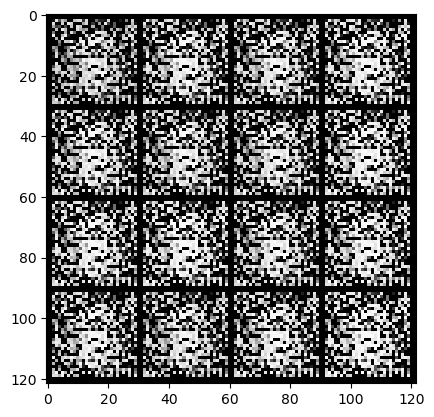

Training epoch 10/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7390289306640625, painter_err: 0.6554813385009766


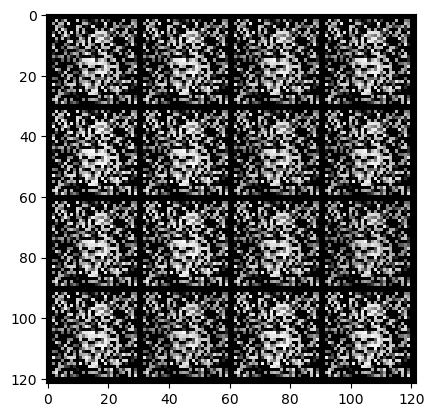

Training epoch 11/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7097572684288025, painter_err: 0.6856557130813599


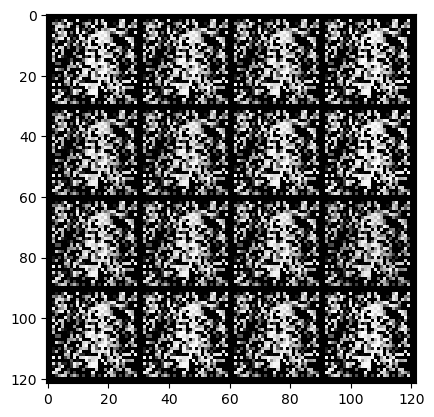

Training epoch 12/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7263339161872864, painter_err: 0.6526296734809875


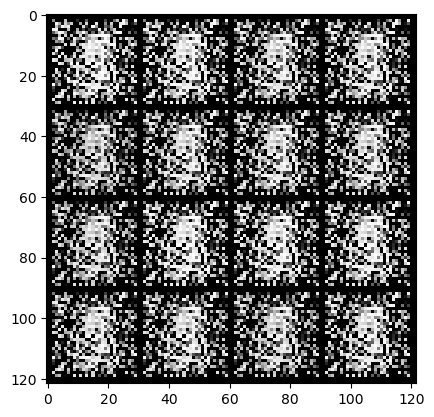

Training epoch 13/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7142224311828613, painter_err: 0.6974911689758301


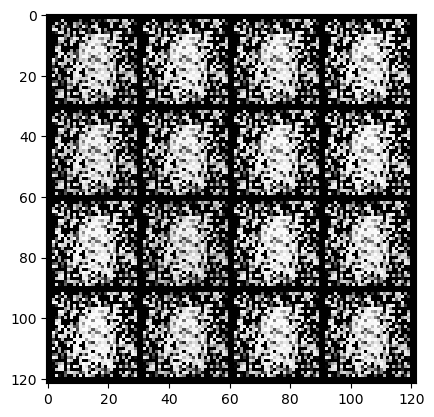

Training epoch 14/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7437335252761841, painter_err: 0.673078715801239


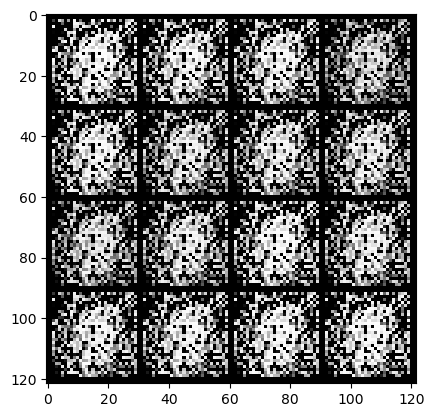

Training epoch 15/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7224881052970886, painter_err: 0.7259364724159241


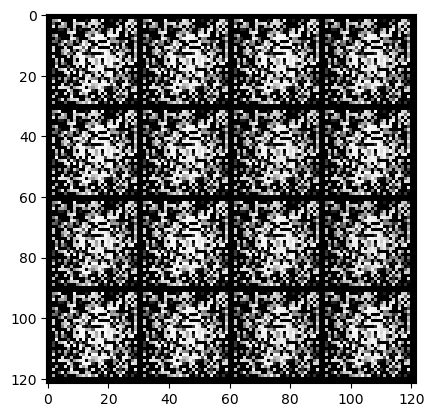

Training epoch 16/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.721507728099823, painter_err: 0.7164453268051147


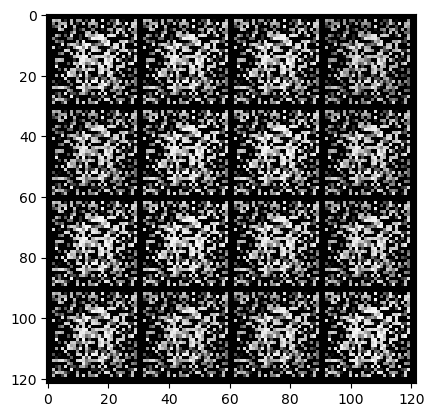

Training epoch 17/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7413812875747681, painter_err: 0.6572083830833435


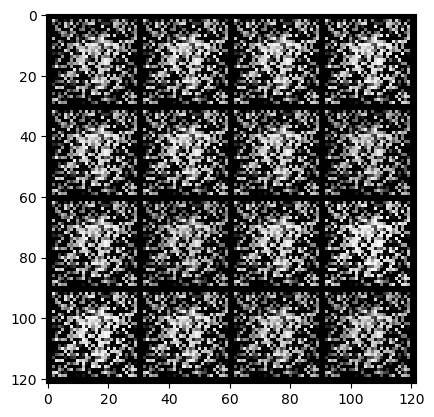

Training epoch 18/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7359369993209839, painter_err: 0.6694419980049133


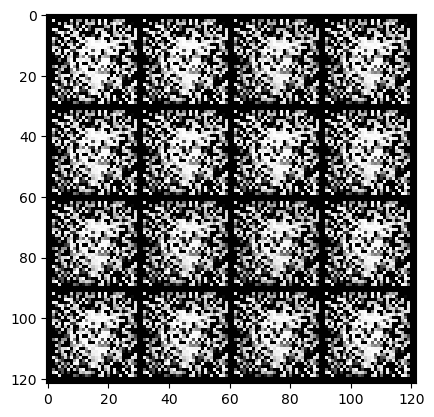

Training epoch 19/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7151136994361877, painter_err: 0.723432719707489


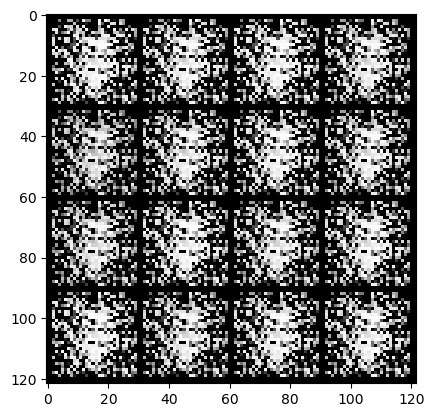

Training epoch 20/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7243306040763855, painter_err: 0.7125974297523499


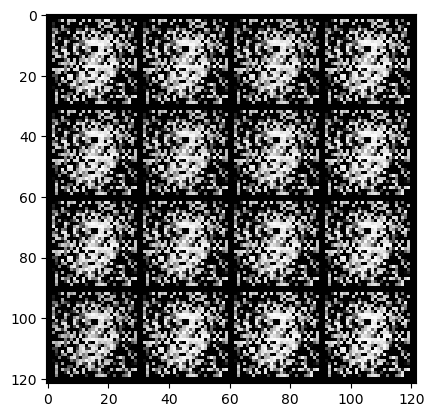

Training epoch 21/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7233945727348328, painter_err: 0.7095435857772827


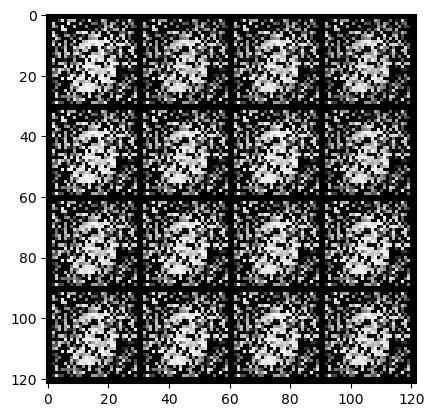

Training epoch 22/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7267339825630188, painter_err: 0.7055867314338684


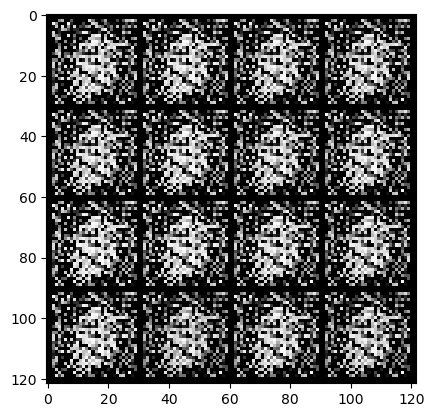

Training epoch 23/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7136707901954651, painter_err: 0.7275134921073914


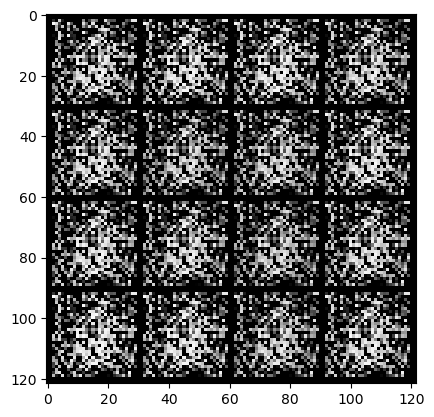

Training epoch 24/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7124712467193604, painter_err: 0.7122735381126404


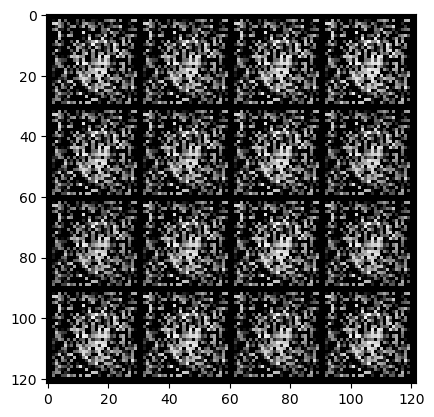

Training epoch 25/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7161285281181335, painter_err: 0.6955796480178833


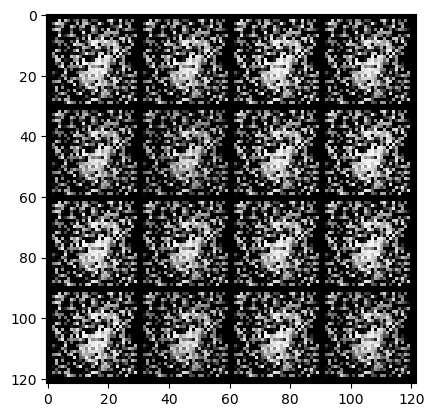

Training epoch 26/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7142366170883179, painter_err: 0.7066566348075867


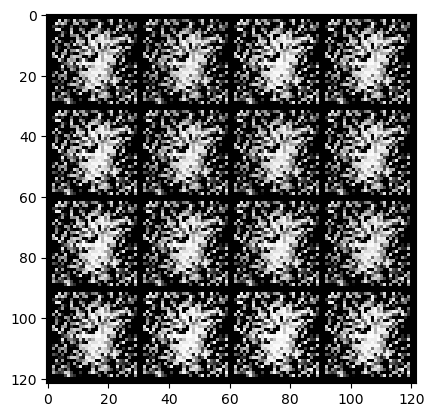

Training epoch 27/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7197647094726562, painter_err: 0.7087817192077637


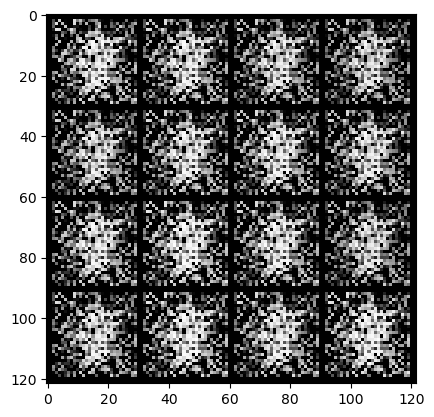

Training epoch 28/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7124348878860474, painter_err: 0.729439377784729


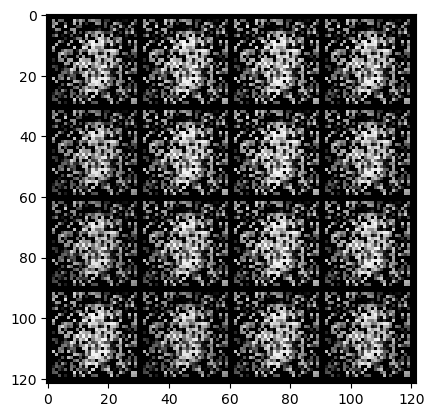

Training epoch 29/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7109192609786987, painter_err: 0.7170132994651794


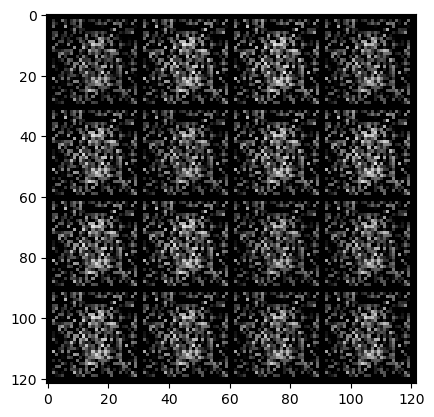

Training epoch 30/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.708549976348877, painter_err: 0.6956509947776794


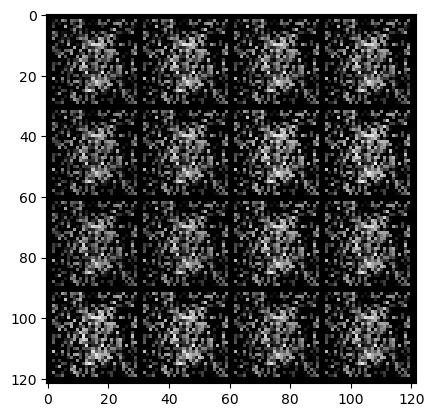

Training epoch 31/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7178410291671753, painter_err: 0.6782928109169006


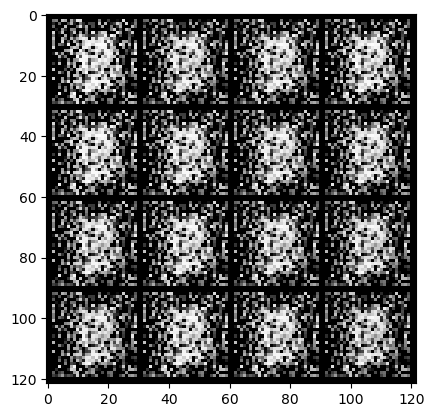

Training epoch 32/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7078847289085388, painter_err: 0.7323636412620544


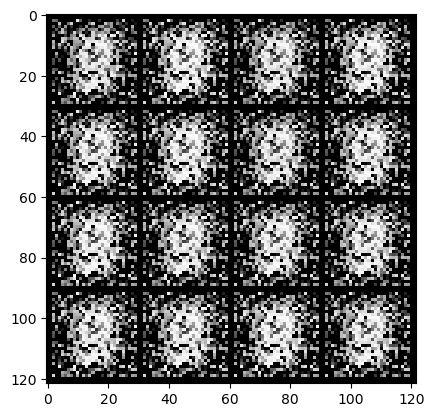

Training epoch 33/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7070028185844421, painter_err: 0.7362792491912842


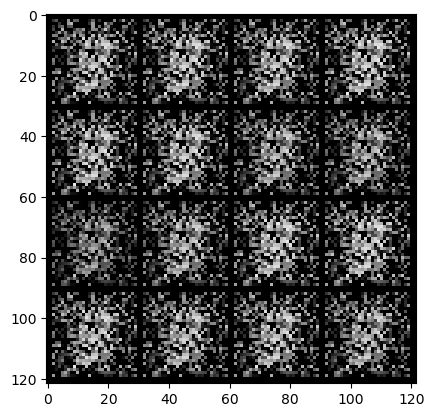

Training epoch 34/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7080007791519165, painter_err: 0.7129104733467102


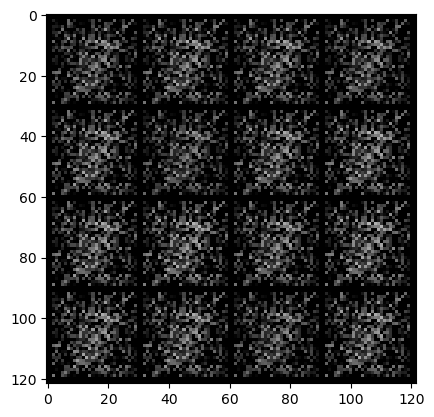

Training epoch 35/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7014281749725342, painter_err: 0.6968982219696045


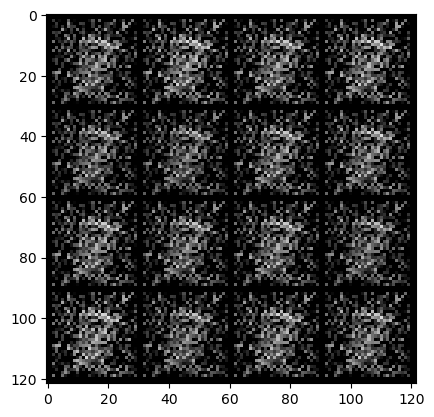

Training epoch 36/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7082109451293945, painter_err: 0.6831578612327576


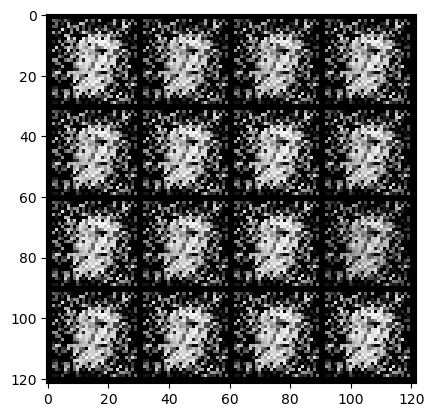

Training epoch 37/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6972445249557495, painter_err: 0.7347939014434814


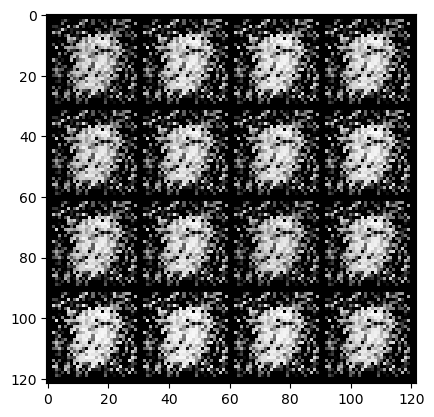

Training epoch 38/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7046907544136047, painter_err: 0.7281016111373901


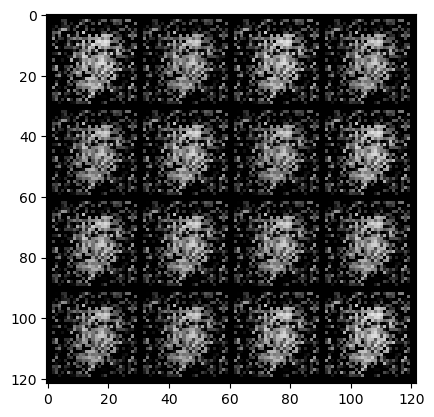

Training epoch 39/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7041389346122742, painter_err: 0.7130852937698364


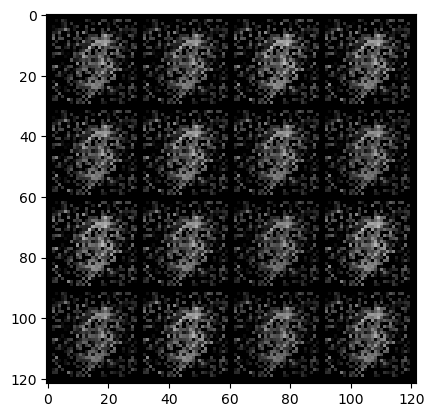

Training epoch 40/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7033265233039856, painter_err: 0.6925285458564758


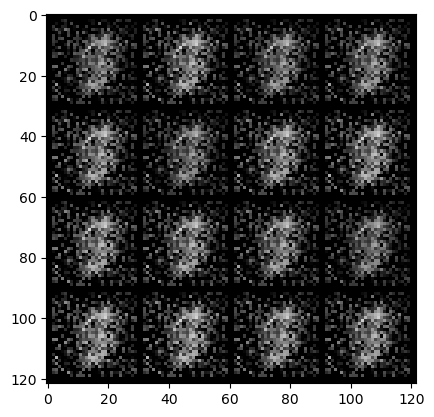

Training epoch 41/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7036904692649841, painter_err: 0.7027950286865234


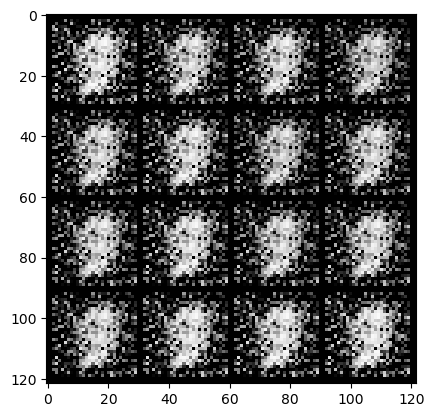

Training epoch 42/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6982905268669128, painter_err: 0.735747754573822


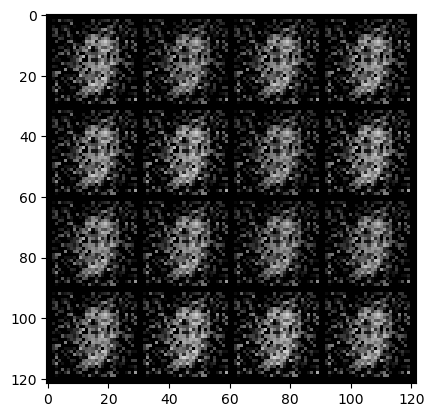

Training epoch 43/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7003543972969055, painter_err: 0.7085320353507996


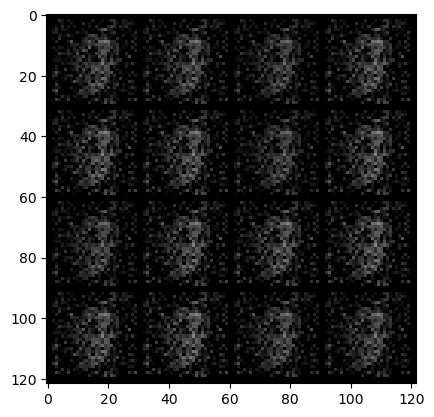

Training epoch 44/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6982946991920471, painter_err: 0.6898148655891418


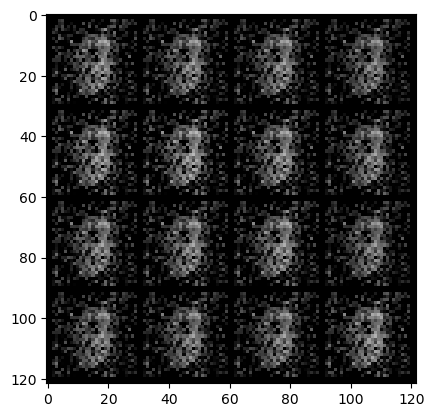

Training epoch 45/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7052696943283081, painter_err: 0.6795623302459717


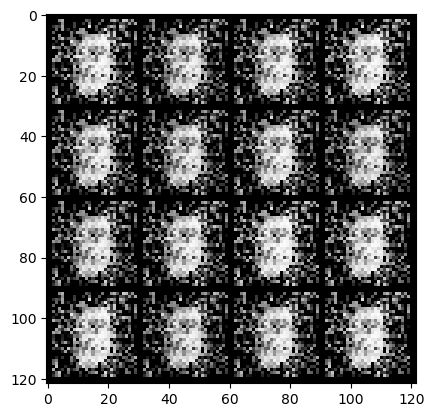

Training epoch 46/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6930072903633118, painter_err: 0.7460665106773376


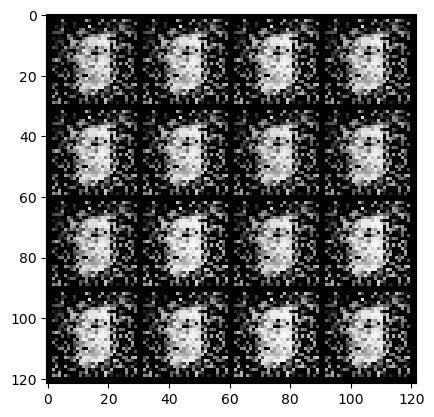

Training epoch 47/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7011939883232117, painter_err: 0.7197052836418152


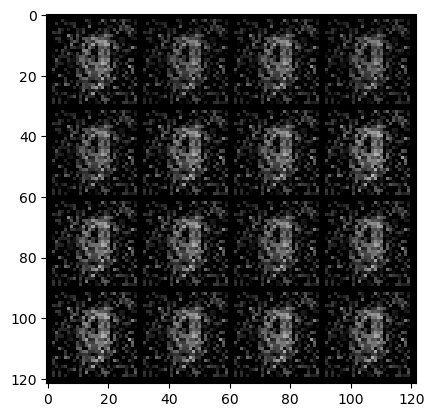

Training epoch 48/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6954832077026367, painter_err: 0.7000885605812073


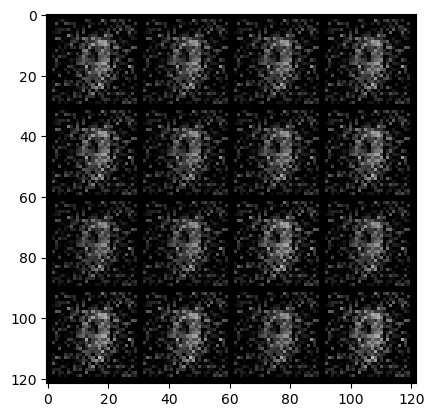

Training epoch 49/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7037696838378906, painter_err: 0.6693345904350281


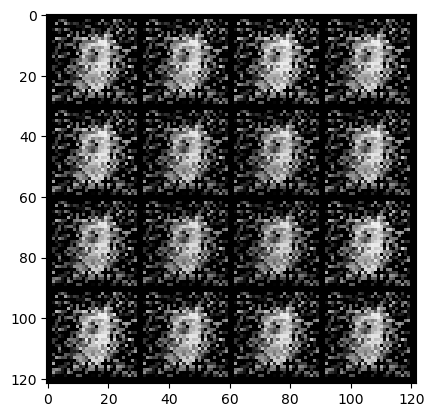

Training epoch 50/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6951432228088379, painter_err: 0.7228187918663025


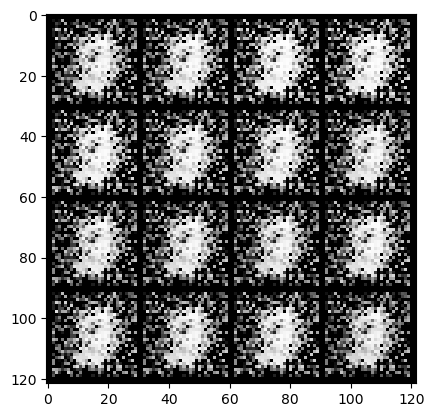

Training epoch 51/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6994118690490723, painter_err: 0.7392475008964539


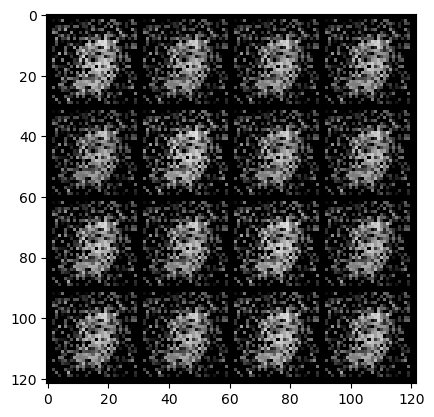

Training epoch 52/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7010254263877869, painter_err: 0.7099047303199768


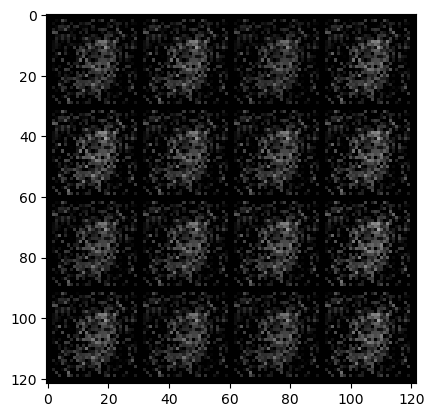

Training epoch 53/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6941238641738892, painter_err: 0.6977814435958862


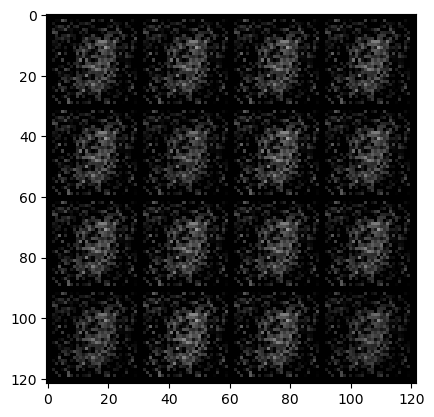

Training epoch 54/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6958415508270264, painter_err: 0.6803501844406128


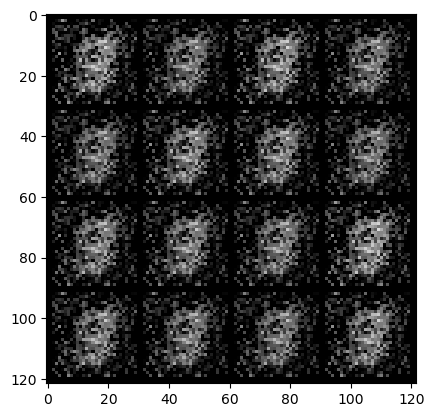

Training epoch 55/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7020552158355713, painter_err: 0.6817100644111633


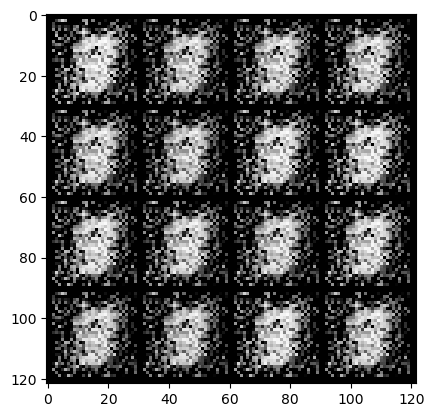

Training epoch 56/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6947340369224548, painter_err: 0.740425705909729


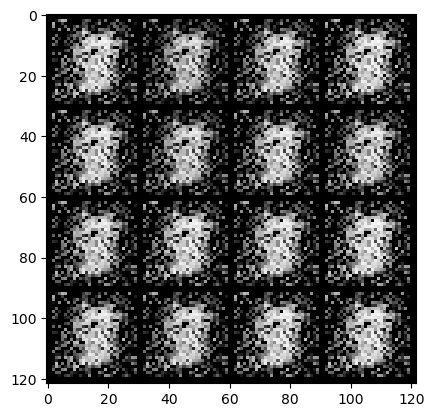

Training epoch 57/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7032766342163086, painter_err: 0.7202431559562683


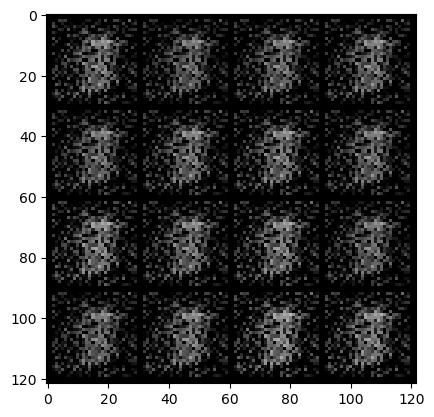

Training epoch 58/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6969516277313232, painter_err: 0.7037755846977234


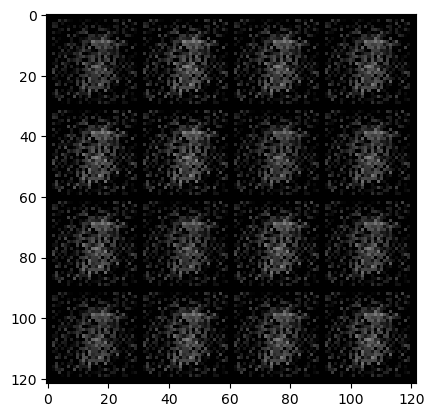

Training epoch 59/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6942446231842041, painter_err: 0.688522458076477


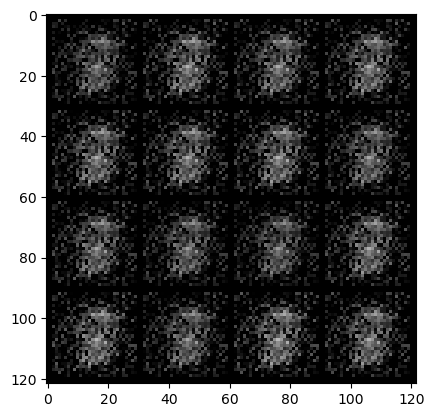

Training epoch 60/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7004692554473877, painter_err: 0.6781814694404602


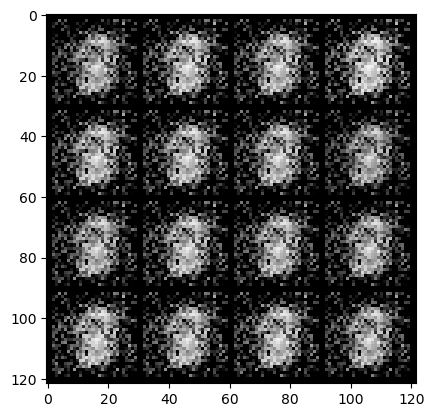

Training epoch 61/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6886341571807861, painter_err: 0.7301270365715027


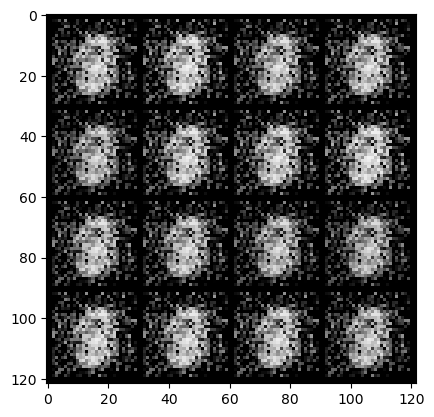

Training epoch 62/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6994779706001282, painter_err: 0.7139274477958679


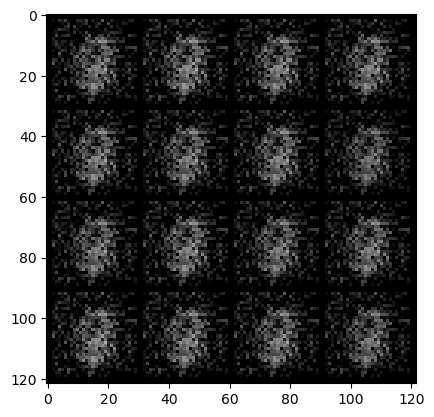

Training epoch 63/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6928633451461792, painter_err: 0.6995501518249512


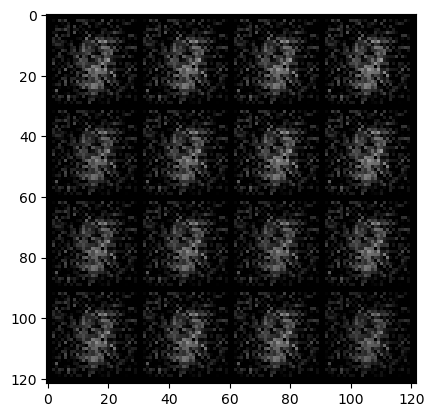

Training epoch 64/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6902675032615662, painter_err: 0.6832402944564819


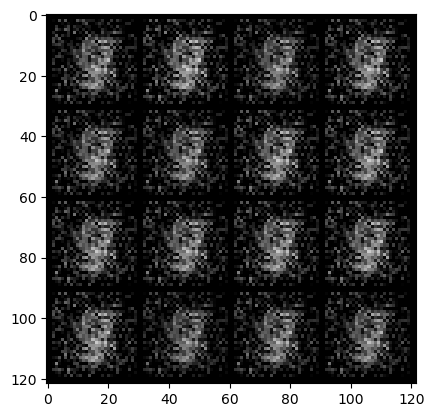

Training epoch 65/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7023457288742065, painter_err: 0.6735033392906189


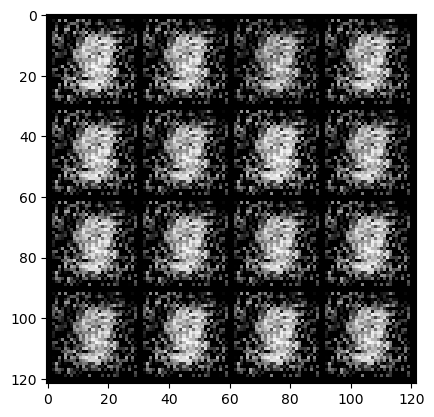

Training epoch 66/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6939145922660828, painter_err: 0.7426256537437439


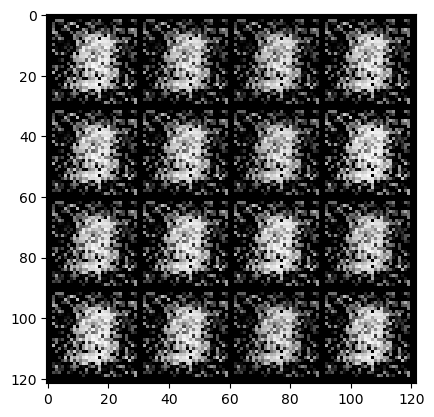

Training epoch 67/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7036800384521484, painter_err: 0.7218802571296692


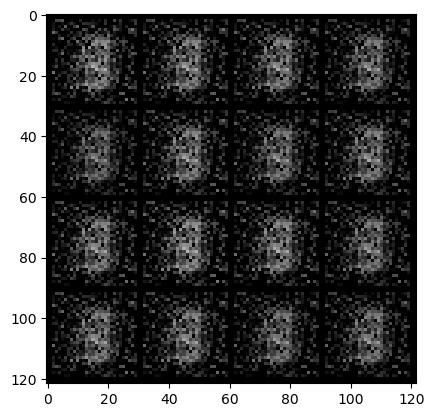

Training epoch 68/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6962845325469971, painter_err: 0.7035815715789795


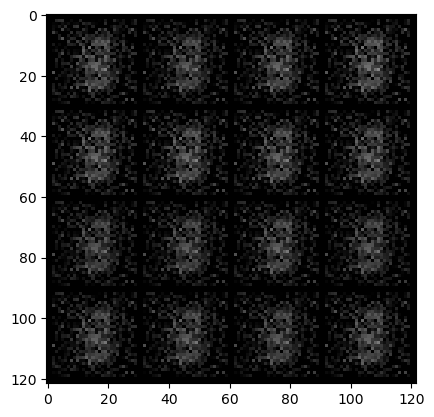

Training epoch 69/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6911527514457703, painter_err: 0.6884306073188782


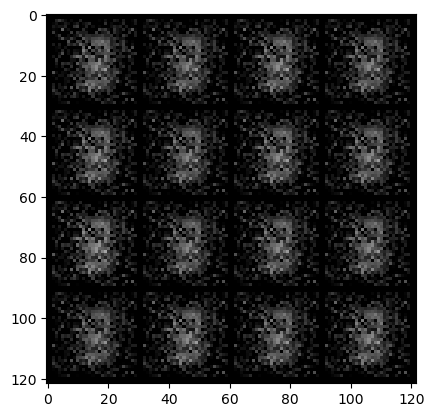

Training epoch 70/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6977241039276123, painter_err: 0.6703789234161377


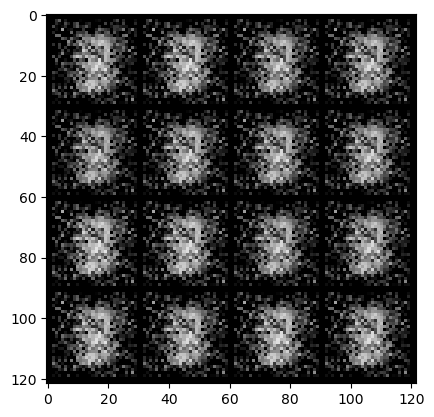

Training epoch 71/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6932755708694458, painter_err: 0.7158828377723694


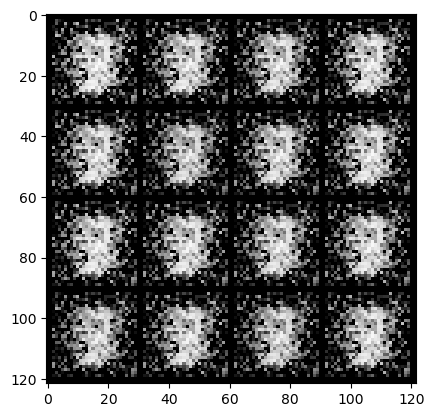

Training epoch 72/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6991506218910217, painter_err: 0.7261759042739868


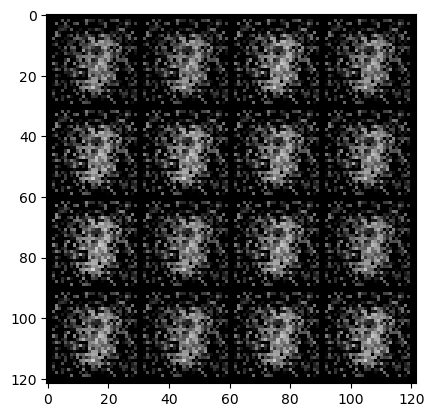

Training epoch 73/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6968948841094971, painter_err: 0.7040857672691345


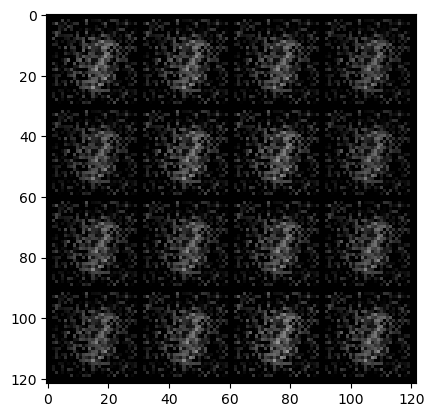

Training epoch 74/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6908212900161743, painter_err: 0.6898529529571533


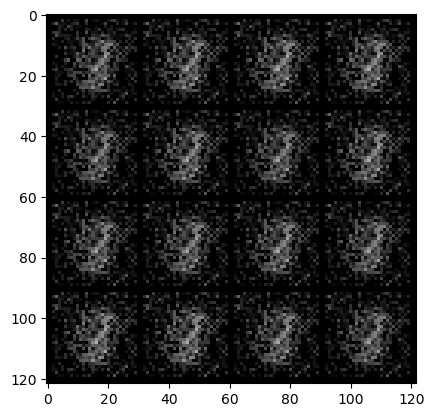

Training epoch 75/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6979015469551086, painter_err: 0.6695701479911804


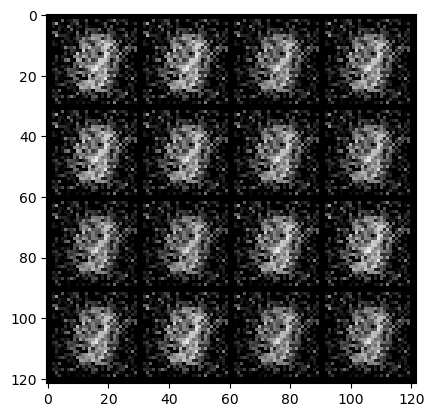

Training epoch 76/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6976414918899536, painter_err: 0.7081261873245239


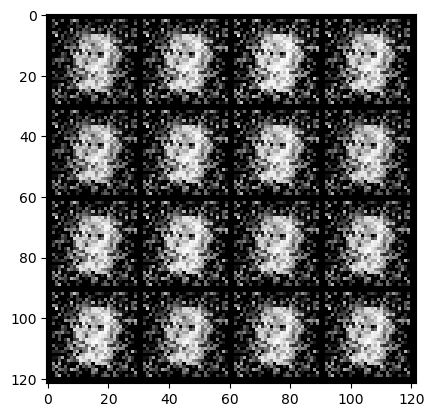

Training epoch 77/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7004477977752686, painter_err: 0.7295387983322144


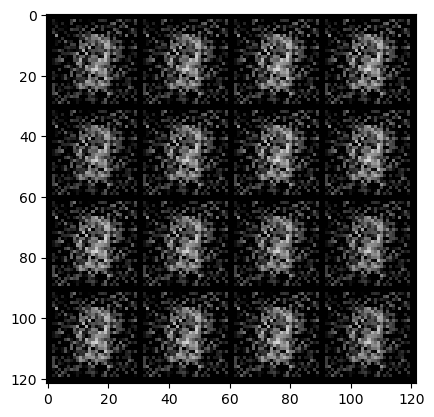

Training epoch 78/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6966812014579773, painter_err: 0.7032226324081421


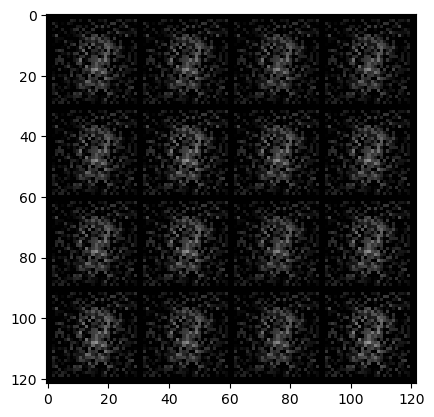

Training epoch 79/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6896935701370239, painter_err: 0.690396249294281


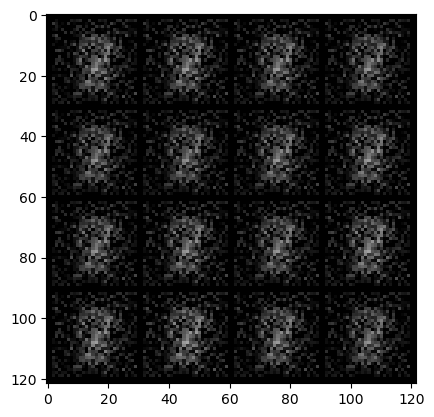

Training epoch 80/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6951515674591064, painter_err: 0.6672101616859436


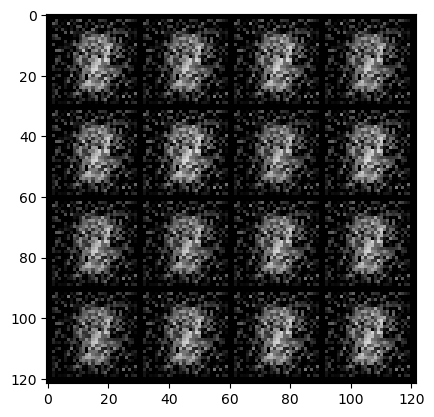

Training epoch 81/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7015724778175354, painter_err: 0.6871870756149292


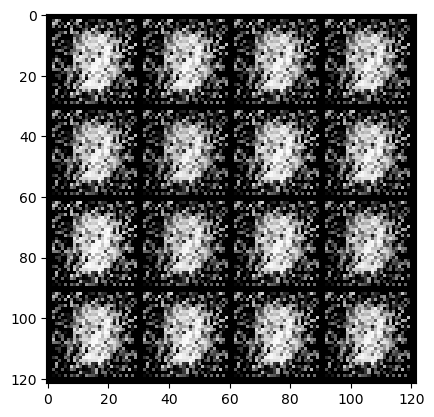

Training epoch 82/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6914016604423523, painter_err: 0.7516198754310608


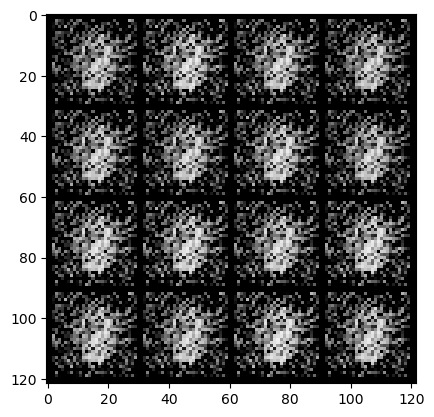

Training epoch 83/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6994197368621826, painter_err: 0.7124956250190735


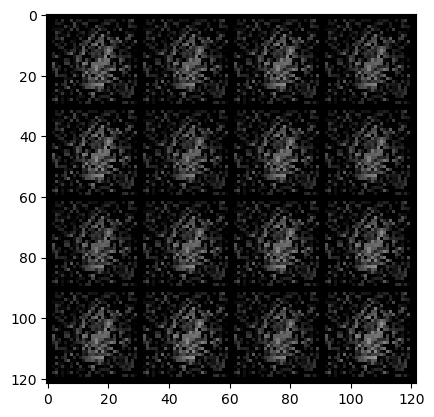

Training epoch 84/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6908623576164246, painter_err: 0.6945868134498596


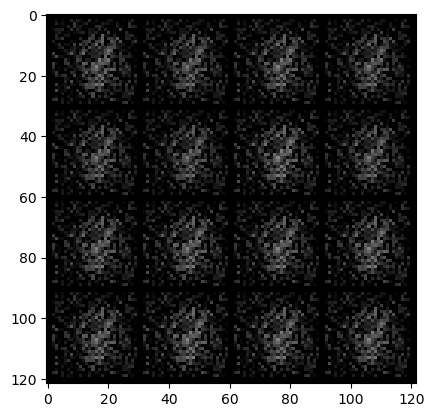

Training epoch 85/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6909257173538208, painter_err: 0.6742679476737976


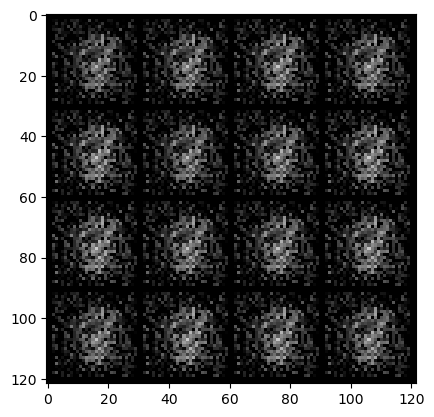

Training epoch 86/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7040795087814331, painter_err: 0.6601453423500061


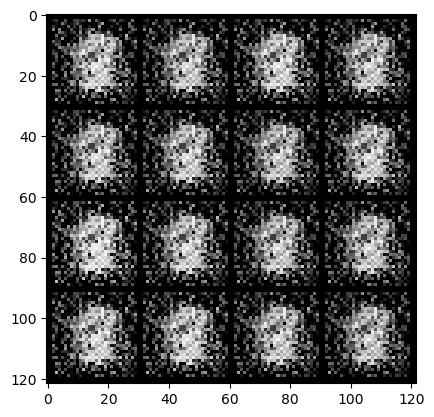

Training epoch 87/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6878779530525208, painter_err: 0.7451039552688599


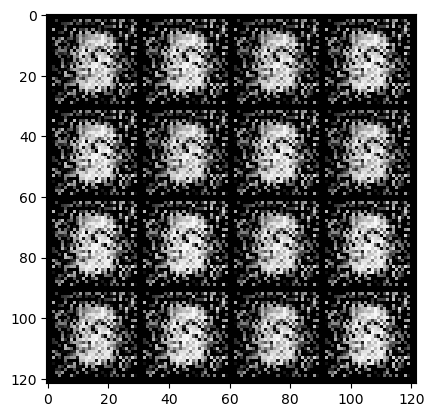

Training epoch 88/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6979964375495911, painter_err: 0.7204205393791199


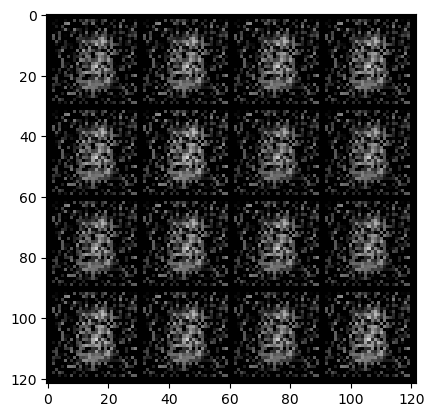

Training epoch 89/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6919186115264893, painter_err: 0.6963559985160828


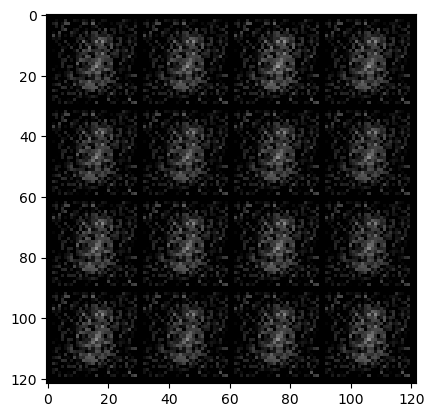

Training epoch 90/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6944715976715088, painter_err: 0.6708092093467712


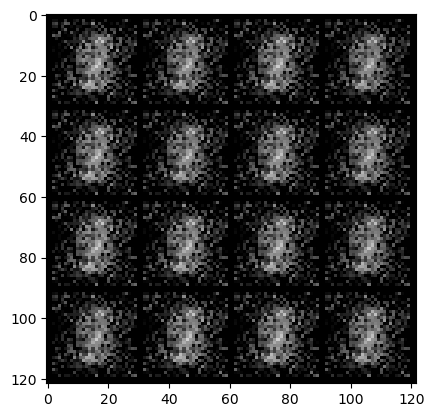

Training epoch 91/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.694794237613678, painter_err: 0.6993541121482849


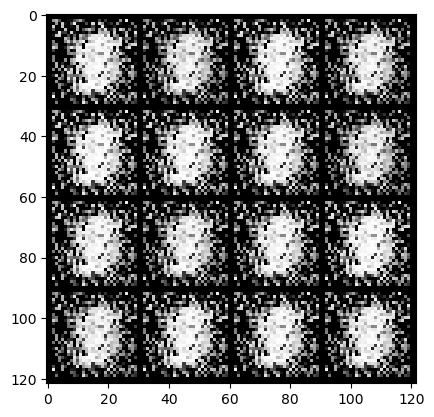

Training epoch 92/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7003502249717712, painter_err: 0.7335307598114014


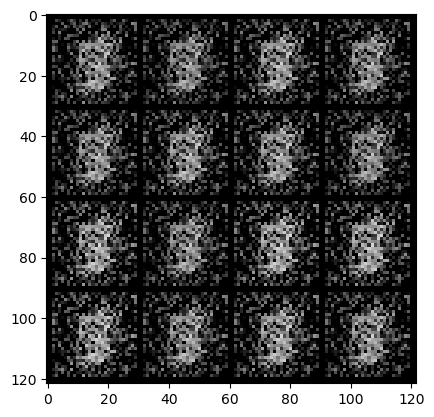

Training epoch 93/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6985064148902893, painter_err: 0.7006391882896423


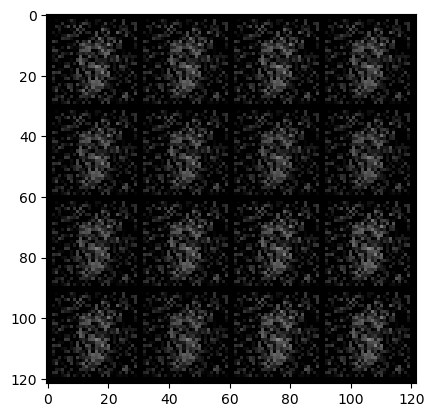

Training epoch 94/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6901746392250061, painter_err: 0.6875437498092651


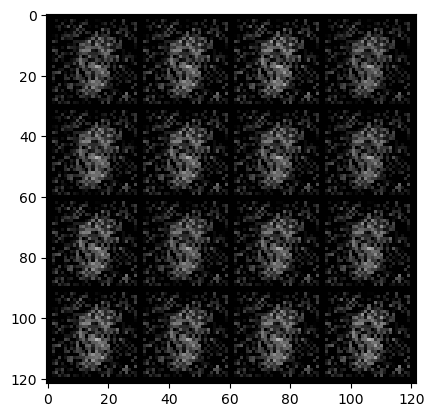

Training epoch 95/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6963380575180054, painter_err: 0.6726793050765991


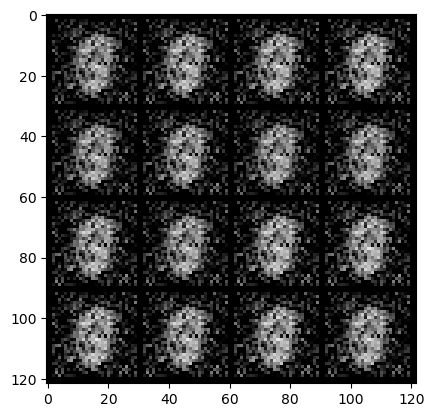

Training epoch 96/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6966351270675659, painter_err: 0.7052311301231384


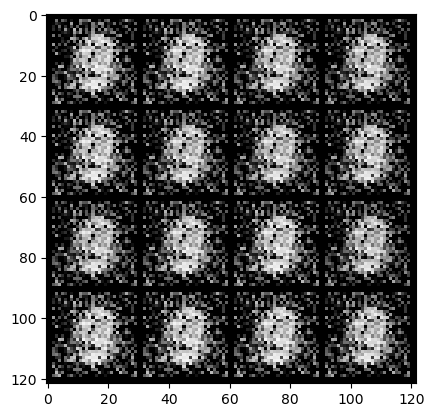

Training epoch 97/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6974087953567505, painter_err: 0.7252365946769714


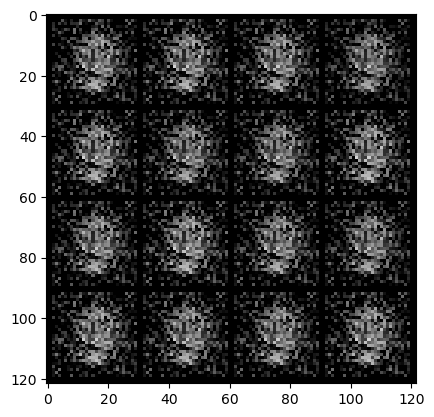

Training epoch 98/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6947525143623352, painter_err: 0.7020772099494934


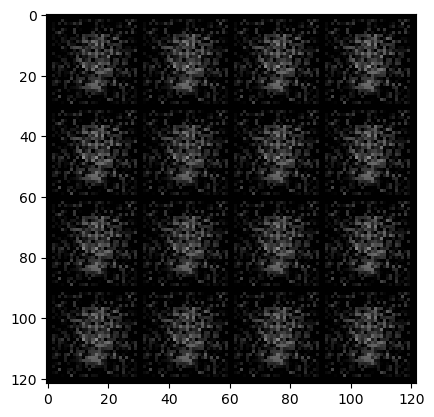

Training epoch 99/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6908015012741089, painter_err: 0.6875177621841431


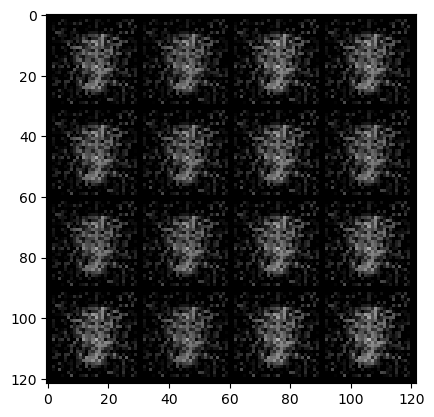

Training epoch 100/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6958985924720764, painter_err: 0.674174964427948


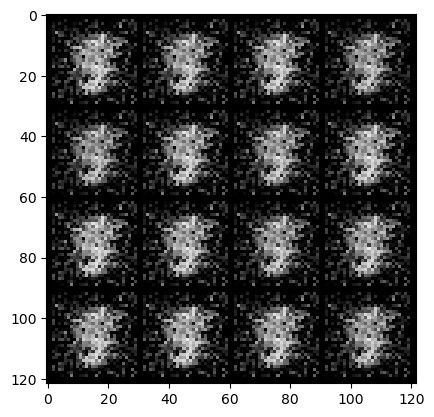

Training epoch 101/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6923877000808716, painter_err: 0.7176334261894226


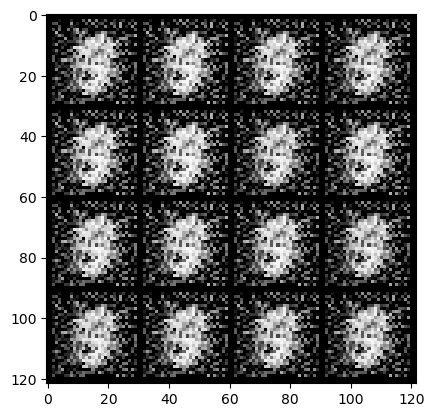

Training epoch 102/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6975229978561401, painter_err: 0.7144759297370911


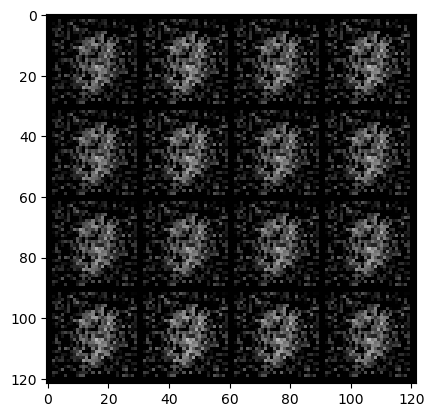

Training epoch 103/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6905373334884644, painter_err: 0.6882563233375549


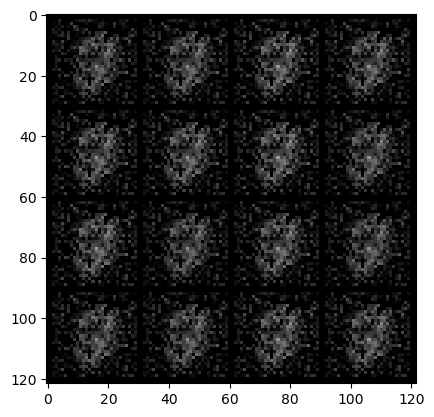

Training epoch 104/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6992397904396057, painter_err: 0.6587668657302856


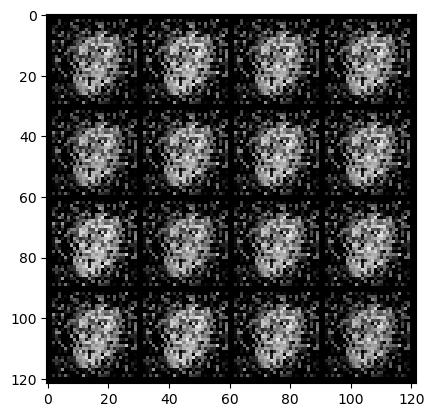

Training epoch 105/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6898799538612366, painter_err: 0.7338899970054626


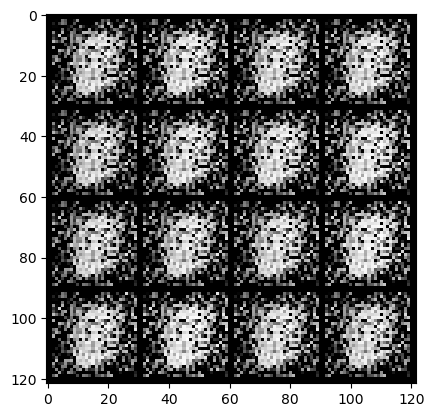

Training epoch 106/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6981512308120728, painter_err: 0.7106855511665344


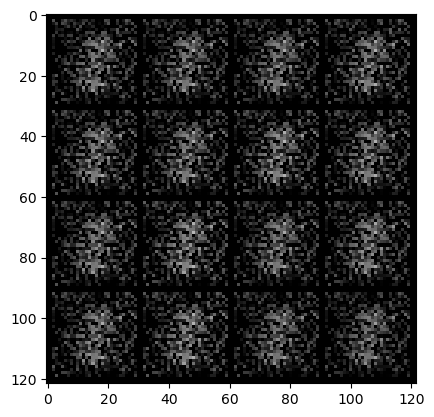

Training epoch 107/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6965513229370117, painter_err: 0.6805698275566101


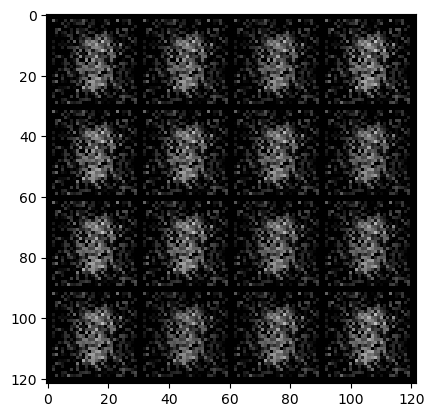

Training epoch 108/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6962031126022339, painter_err: 0.6980778574943542


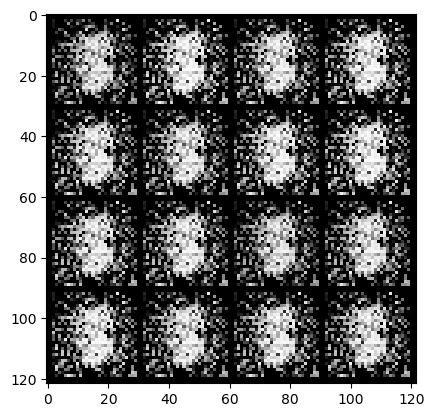

Training epoch 109/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6969741582870483, painter_err: 0.7222951650619507


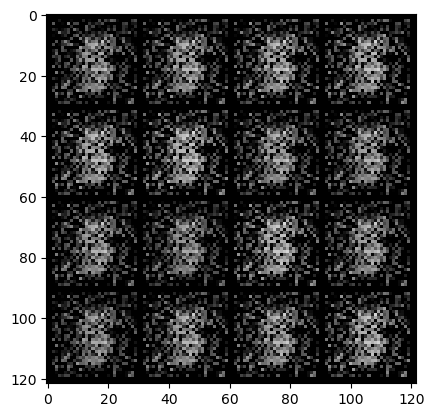

Training epoch 110/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6927050352096558, painter_err: 0.6950604915618896


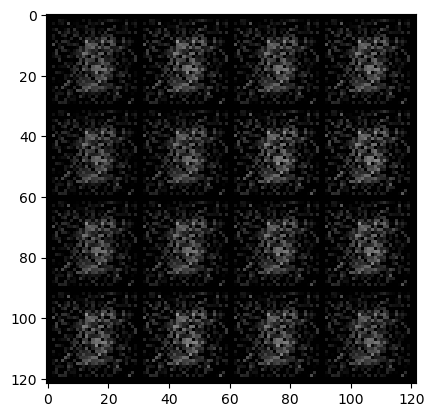

Training epoch 111/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.706091046333313, painter_err: 0.6540747284889221


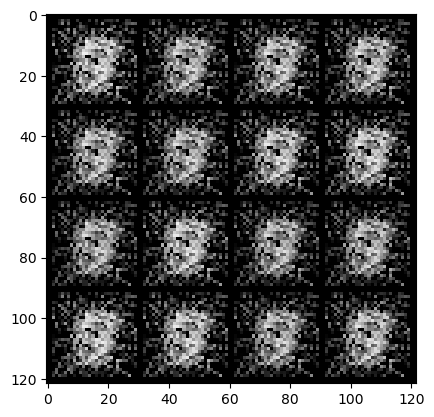

Training epoch 112/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6782004833221436, painter_err: 0.7725358605384827


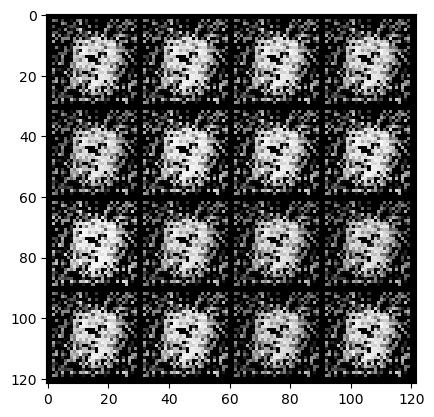

Training epoch 113/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6995622515678406, painter_err: 0.7095547914505005


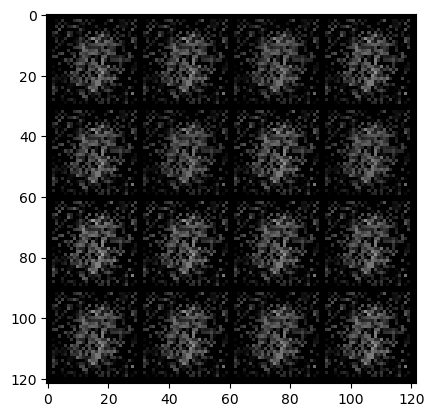

Training epoch 114/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6927474141120911, painter_err: 0.688787579536438


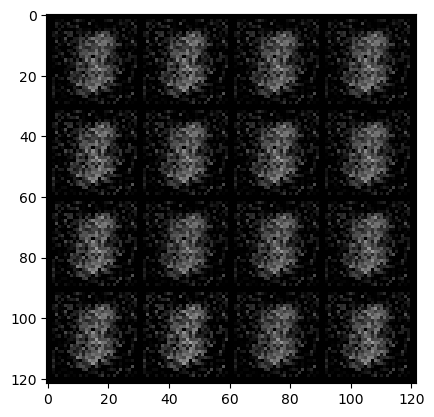

Training epoch 115/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7025359272956848, painter_err: 0.6684820055961609


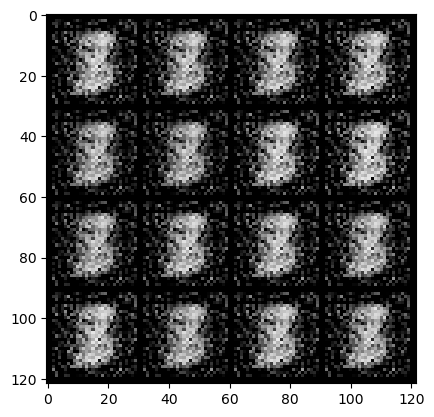

Training epoch 116/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6916442513465881, painter_err: 0.7263606786727905


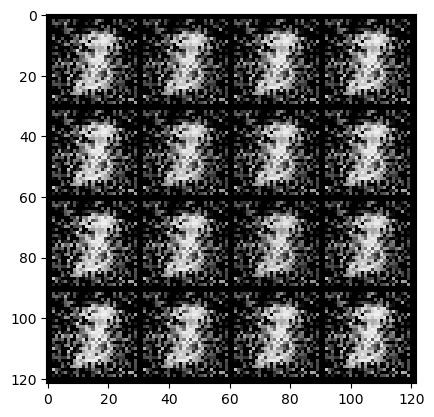

Training epoch 117/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6999711394309998, painter_err: 0.7094830870628357


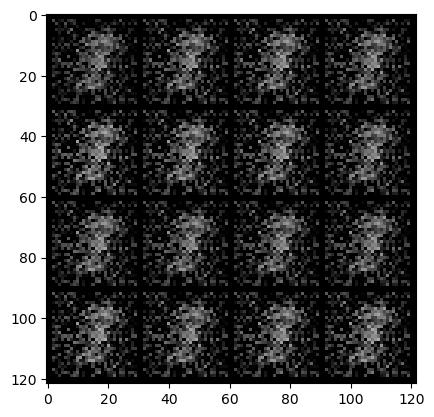

Training epoch 118/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6919074654579163, painter_err: 0.6967599391937256


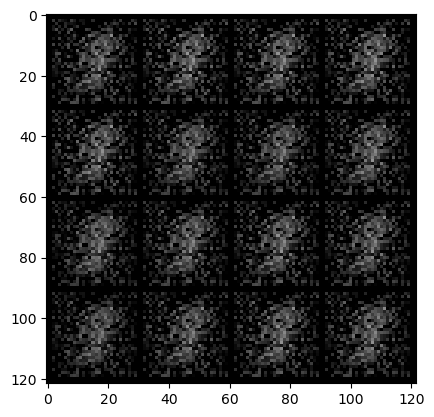

Training epoch 119/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.690620481967926, painter_err: 0.6795116066932678


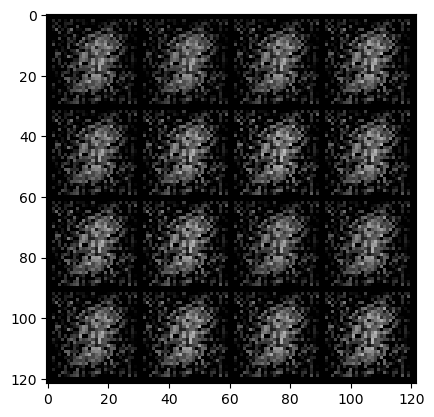

Training epoch 120/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7028621435165405, painter_err: 0.6655409932136536


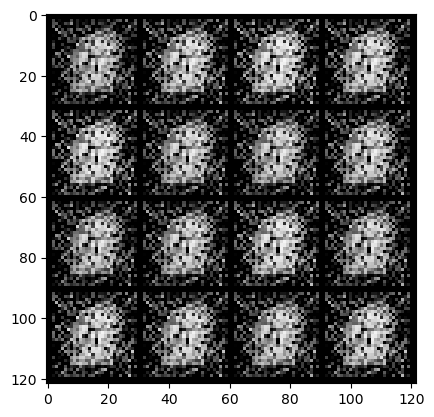

Training epoch 121/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6888643503189087, painter_err: 0.7400743365287781


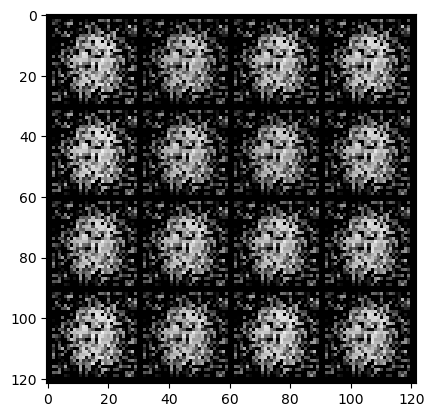

Training epoch 122/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6965381503105164, painter_err: 0.7052220106124878


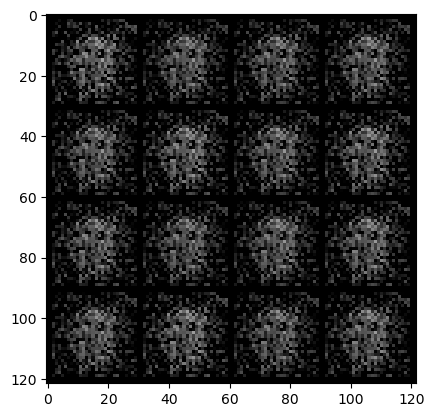

Training epoch 123/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6905263662338257, painter_err: 0.6879643797874451


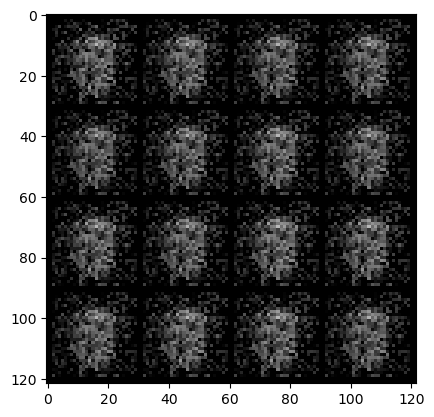

Training epoch 124/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6957032680511475, painter_err: 0.6809539794921875


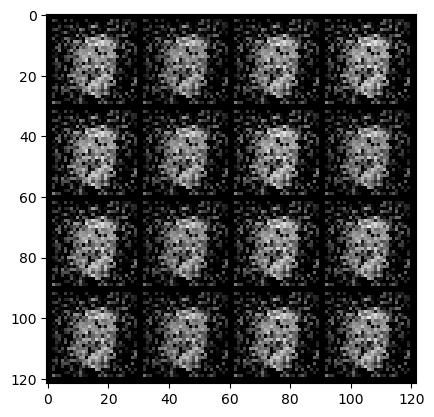

Training epoch 125/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6927123069763184, painter_err: 0.7057695388793945


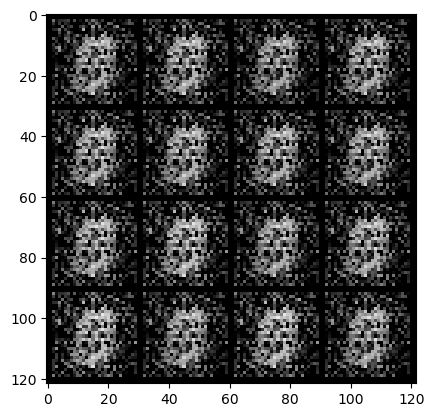

Training epoch 126/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6925595998764038, painter_err: 0.6965359449386597


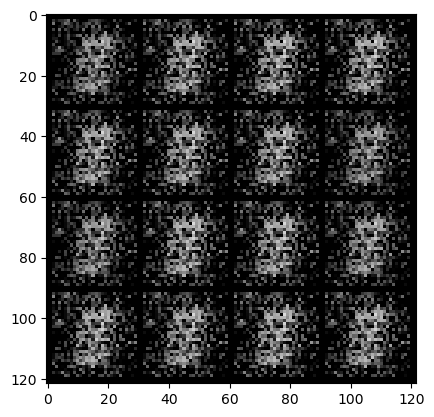

Training epoch 127/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6895725131034851, painter_err: 0.6937991976737976


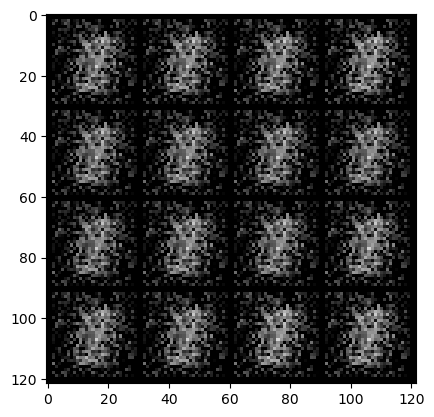

Training epoch 128/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7018879055976868, painter_err: 0.6777092218399048


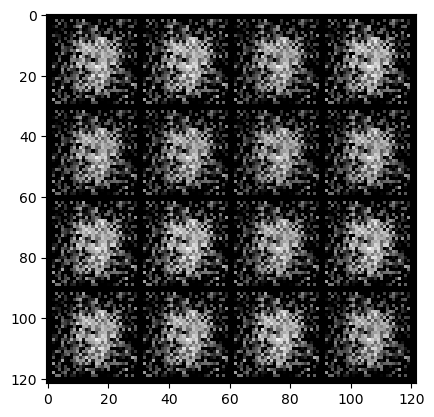

Training epoch 129/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.690905749797821, painter_err: 0.7157249450683594


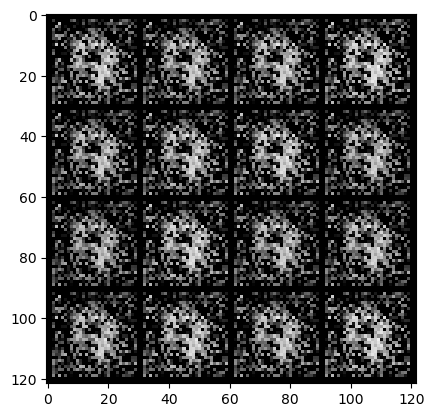

Training epoch 130/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6893032789230347, painter_err: 0.6875717043876648


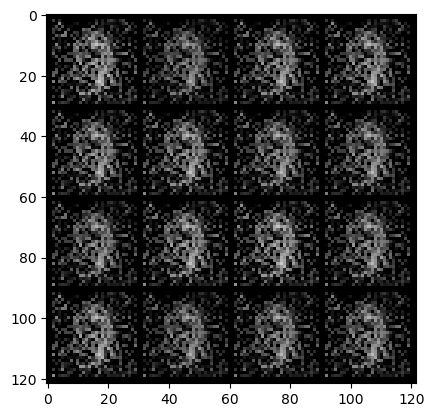

Training epoch 131/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7120220065116882, painter_err: 0.663356363773346


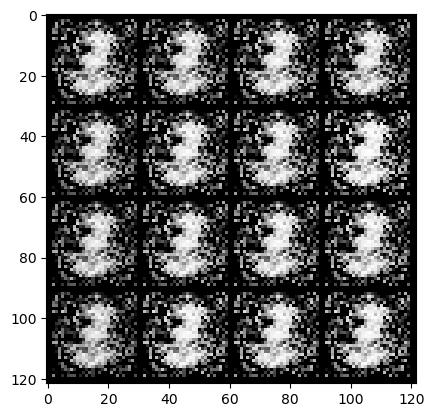

Training epoch 132/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6900072693824768, painter_err: 0.7385478615760803


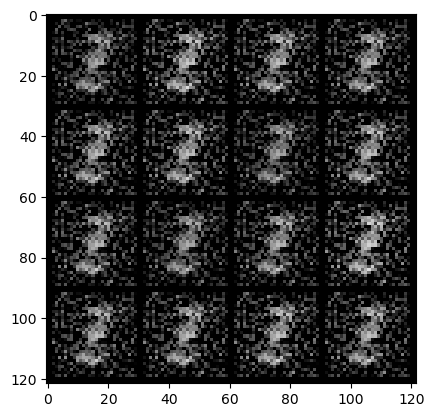

Training epoch 133/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6951915621757507, painter_err: 0.6762062907218933


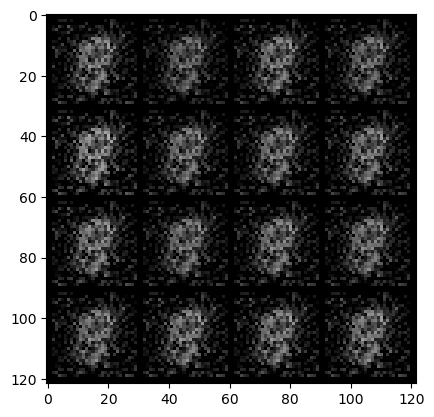

Training epoch 134/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7046048045158386, painter_err: 0.6784858107566833


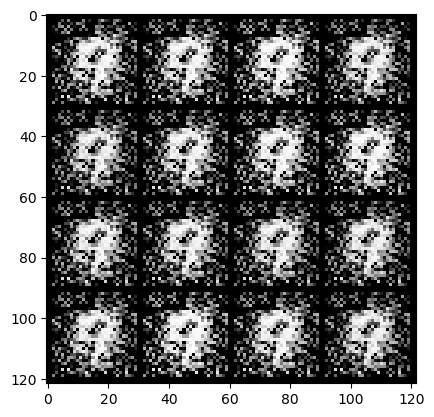

Training epoch 135/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6966844797134399, painter_err: 0.7326470613479614


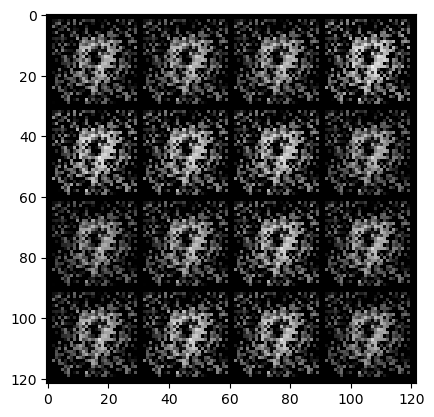

Training epoch 136/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6963834166526794, painter_err: 0.6933586001396179


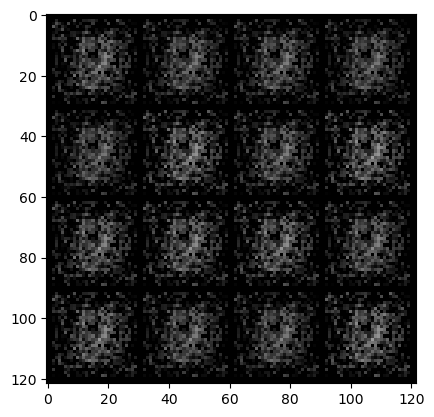

Training epoch 137/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6979069113731384, painter_err: 0.6703187227249146


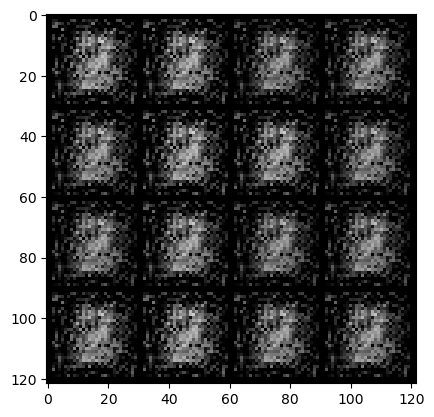

Training epoch 138/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.698920726776123, painter_err: 0.6948241591453552


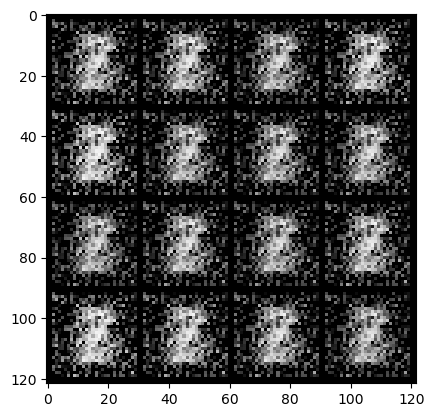

Training epoch 139/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6963402032852173, painter_err: 0.7123663425445557


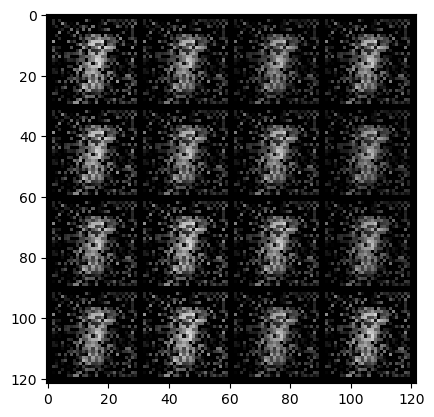

Training epoch 140/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6855838298797607, painter_err: 0.6962133049964905


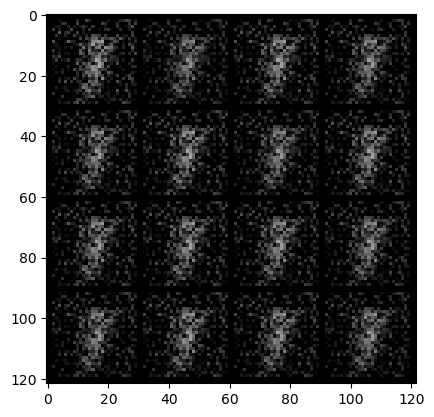

Training epoch 141/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6934301257133484, painter_err: 0.646774172782898


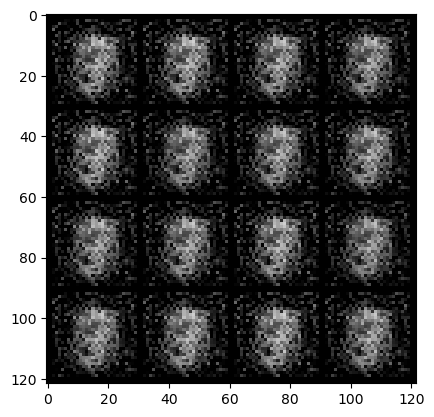

Training epoch 142/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7008490562438965, painter_err: 0.7160511612892151


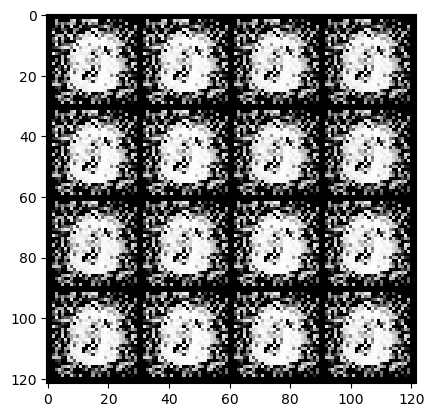

Training epoch 143/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6833475232124329, painter_err: 0.8015275597572327


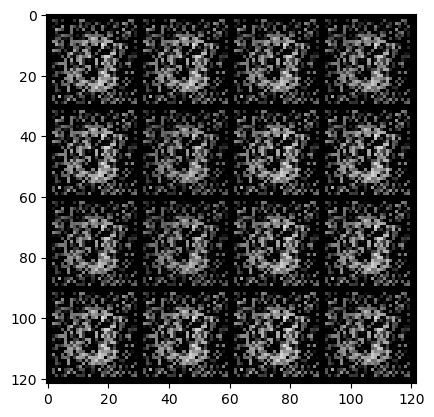

Training epoch 144/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6920119524002075, painter_err: 0.6935960054397583


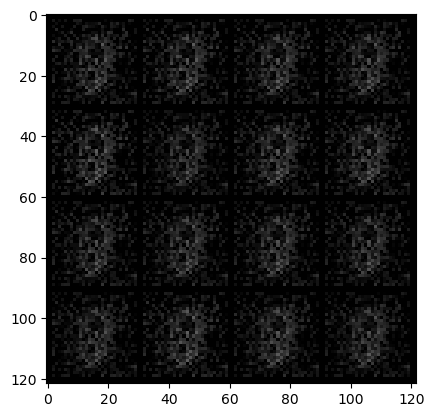

Training epoch 145/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7043672800064087, painter_err: 0.6326475143432617


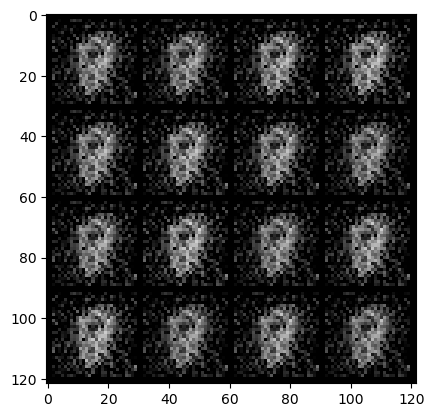

Training epoch 146/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6860541105270386, painter_err: 0.7326423525810242


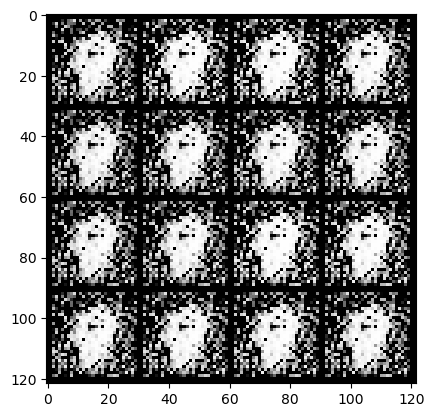

Training epoch 147/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7034910917282104, painter_err: 0.7311833500862122


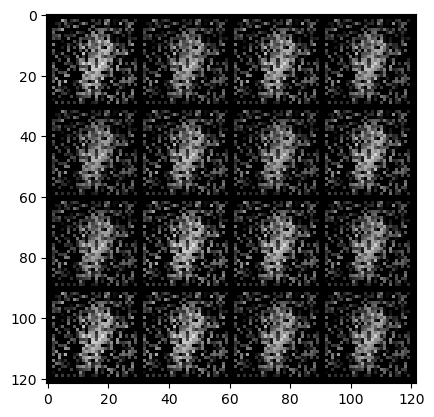

Training epoch 148/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6929399967193604, painter_err: 0.6960545778274536


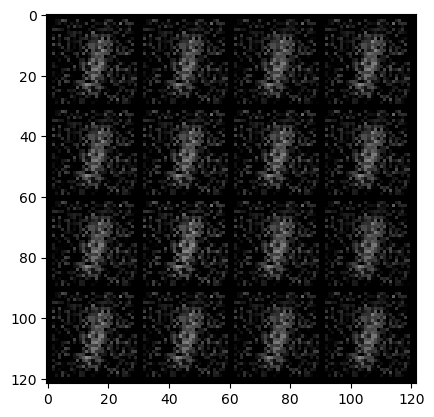

Training epoch 149/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6885586977005005, painter_err: 0.669019877910614


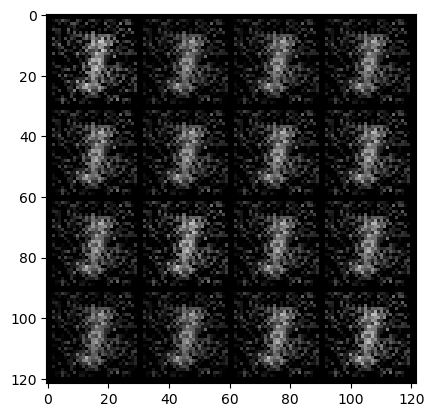

Training epoch 150/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.712077260017395, painter_err: 0.6397910118103027


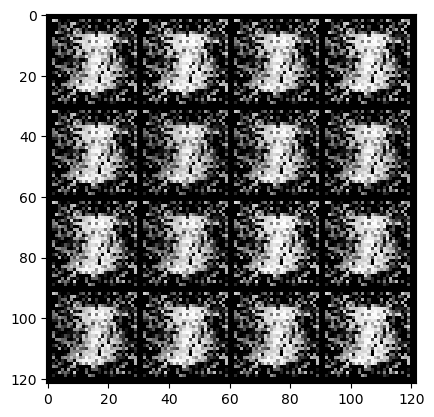

Training epoch 151/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6649153828620911, painter_err: 0.8157535791397095


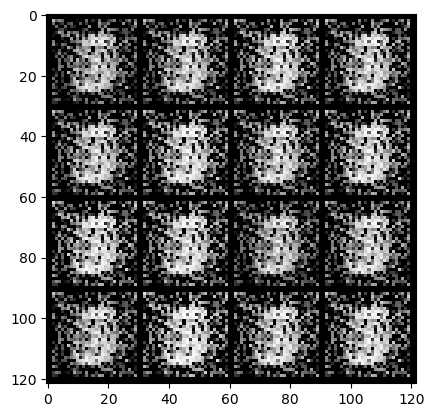

Training epoch 152/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7053277492523193, painter_err: 0.6899236440658569


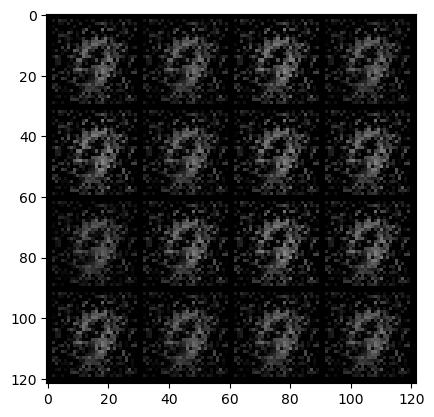

Training epoch 153/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7139400243759155, painter_err: 0.636955976486206


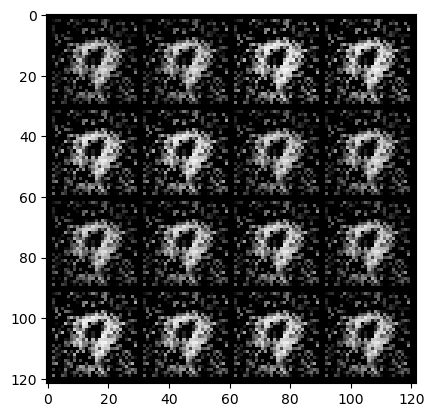

Training epoch 154/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6853697299957275, painter_err: 0.7243640422821045


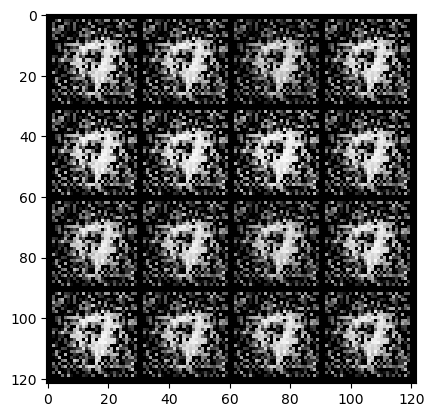

Training epoch 155/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6925259828567505, painter_err: 0.7072587609291077


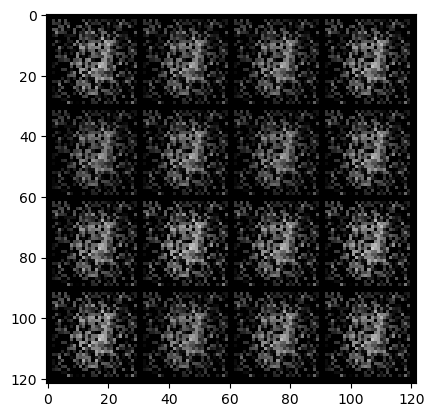

Training epoch 156/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7002871632575989, painter_err: 0.6631048917770386


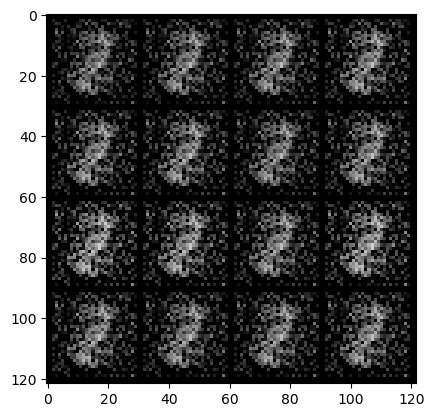

Training epoch 157/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6924518346786499, painter_err: 0.7017064690589905


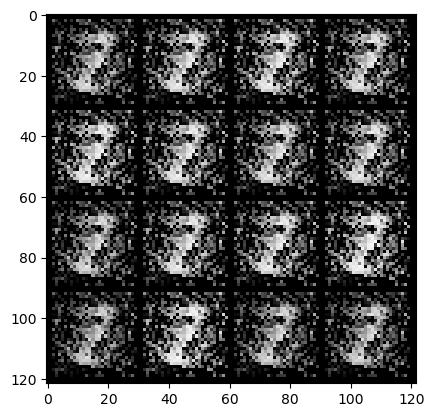

Training epoch 158/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.688685953617096, painter_err: 0.7077018618583679


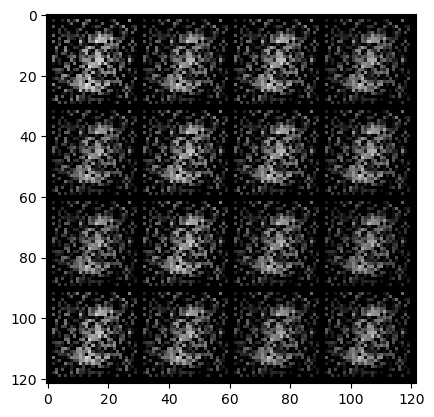

Training epoch 159/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7006565928459167, painter_err: 0.6634531617164612


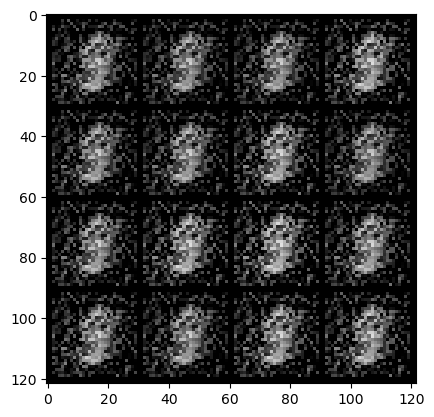

Training epoch 160/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7024641036987305, painter_err: 0.6928206086158752


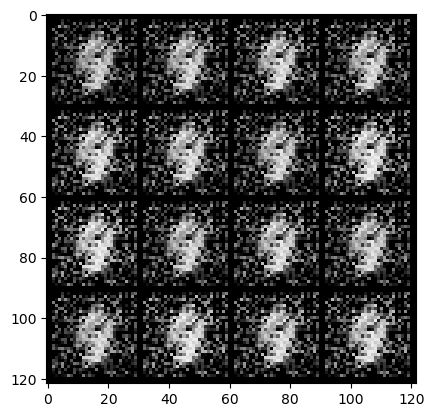

Training epoch 161/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6936898827552795, painter_err: 0.7127587199211121


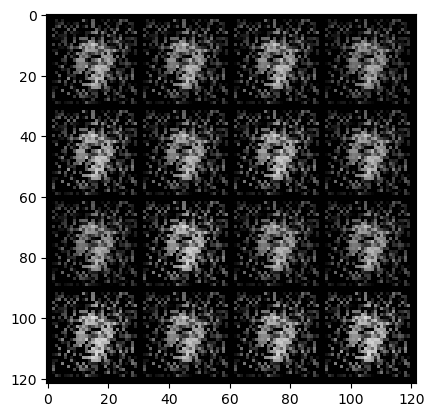

Training epoch 162/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6885101199150085, painter_err: 0.6933141350746155


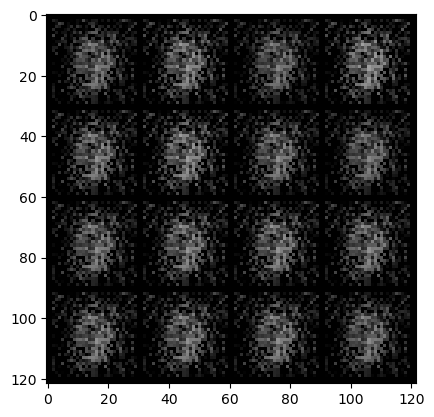

Training epoch 163/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.698654055595398, painter_err: 0.6522892713546753


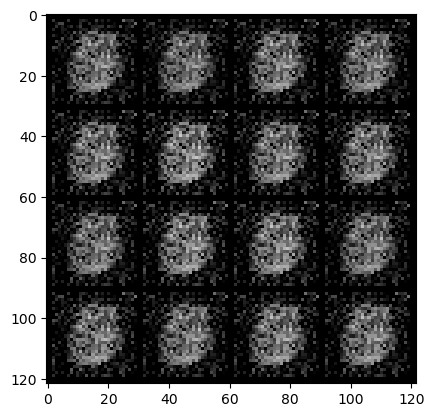

Training epoch 164/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6978405714035034, painter_err: 0.6952952146530151


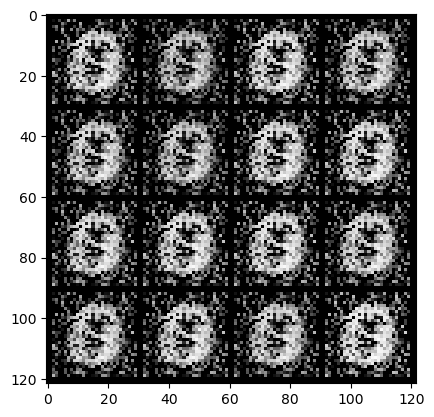

Training epoch 165/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6755785942077637, painter_err: 0.733933687210083


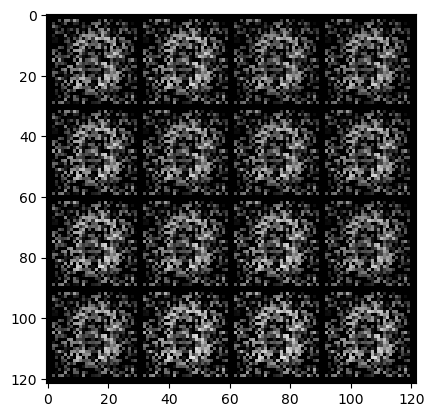

Training epoch 166/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7088651061058044, painter_err: 0.6288174986839294


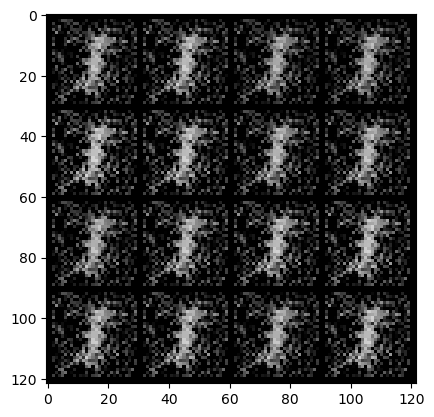

Training epoch 167/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.706553041934967, painter_err: 0.676400363445282


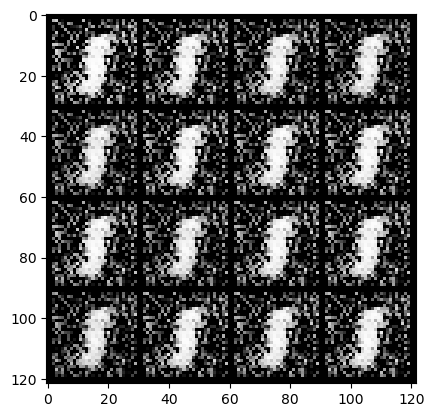

Training epoch 168/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7009572982788086, painter_err: 0.7300376892089844


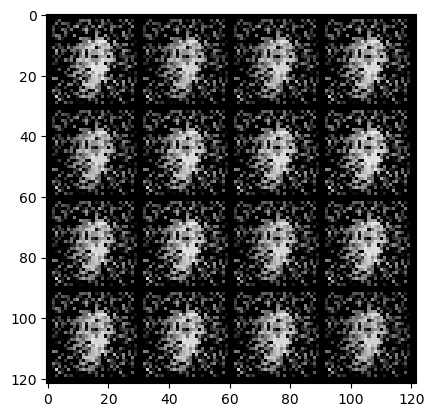

Training epoch 169/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7070848345756531, painter_err: 0.6812801361083984


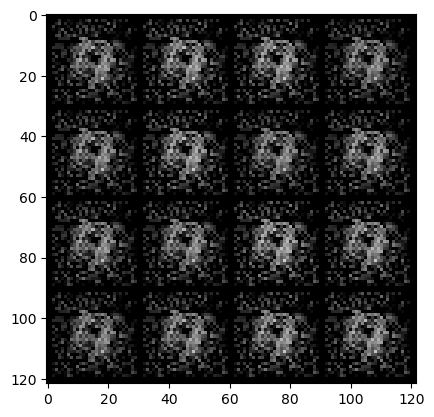

Training epoch 170/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7043009996414185, painter_err: 0.6741244792938232


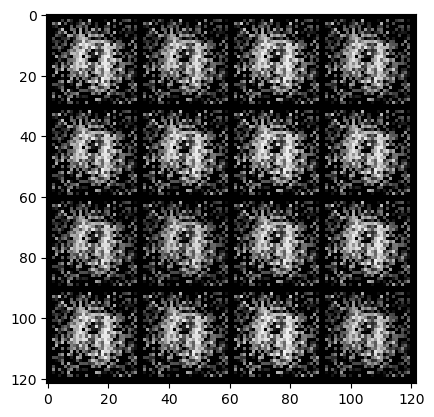

Training epoch 171/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6934273838996887, painter_err: 0.7142062783241272


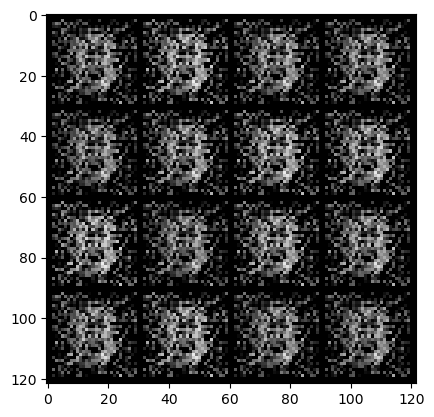

Training epoch 172/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7052773237228394, painter_err: 0.6772751808166504


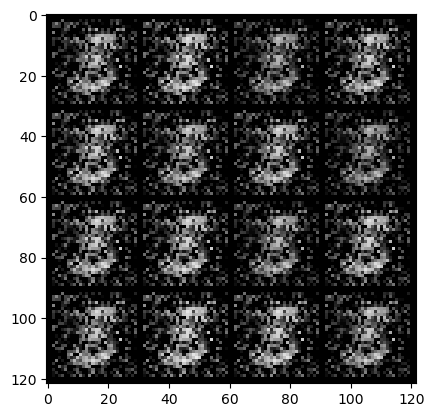

Training epoch 173/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6977888941764832, painter_err: 0.7031040191650391


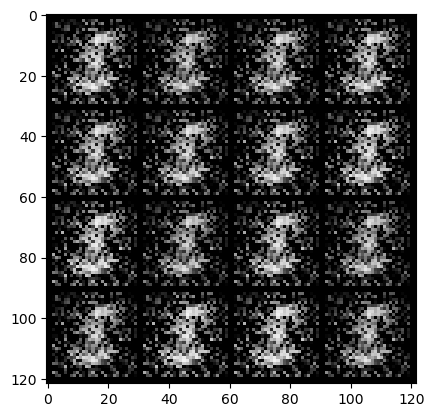

Training epoch 174/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6990209817886353, painter_err: 0.6953859329223633


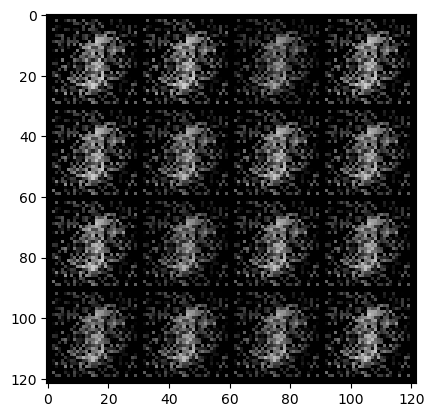

Training epoch 175/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6999542713165283, painter_err: 0.6777469515800476


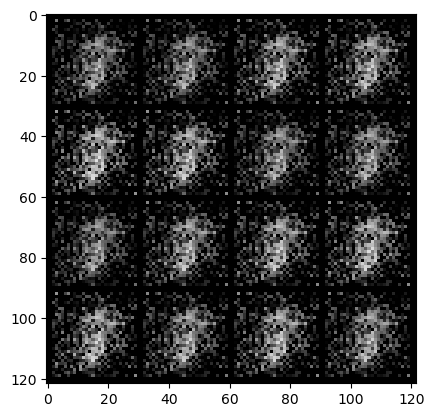

Training epoch 176/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6987174153327942, painter_err: 0.6929320096969604


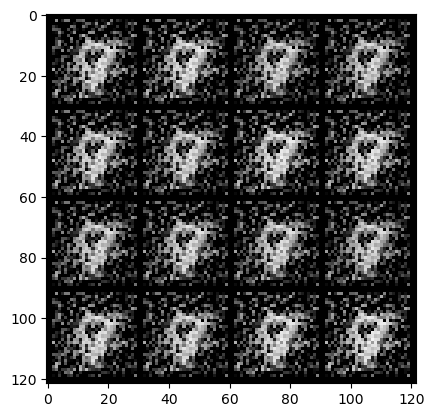

Training epoch 177/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6947185397148132, painter_err: 0.700488269329071


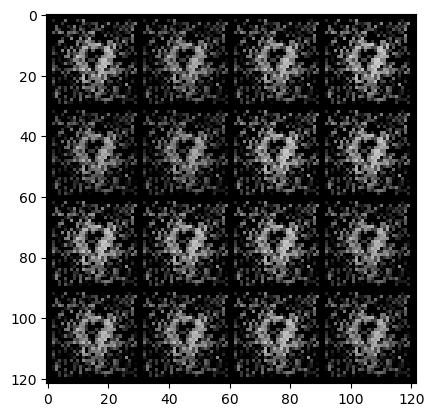

Training epoch 178/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6922817230224609, painter_err: 0.6818841099739075


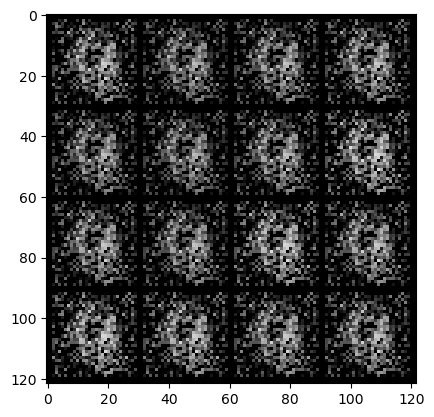

Training epoch 179/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6946091055870056, painter_err: 0.6873518824577332


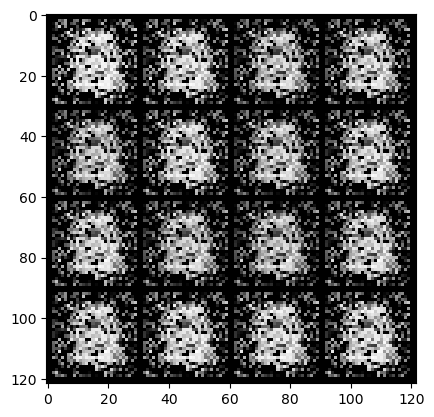

Training epoch 180/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.694130539894104, painter_err: 0.7203087210655212


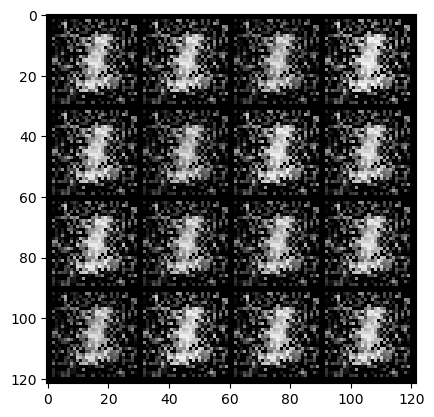

Training epoch 181/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7024186849594116, painter_err: 0.6917558312416077


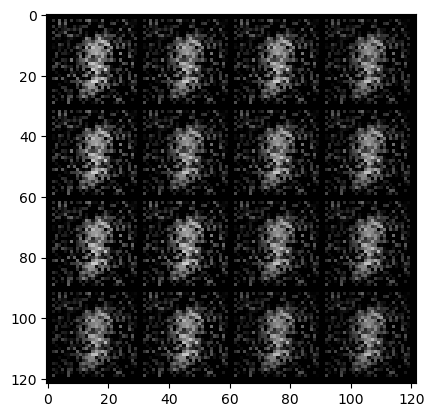

Training epoch 182/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7046498656272888, painter_err: 0.6735677123069763


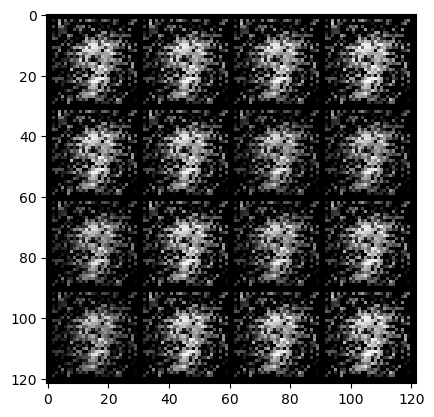

Training epoch 183/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6929187178611755, painter_err: 0.7113805413246155


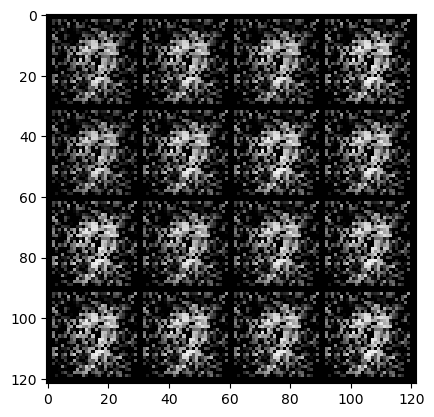

Training epoch 184/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.694185197353363, painter_err: 0.691631019115448


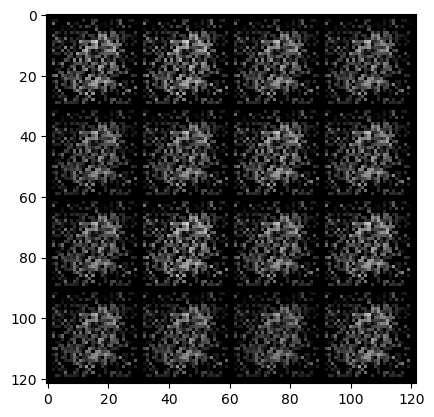

Training epoch 185/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7054890394210815, painter_err: 0.6781026124954224


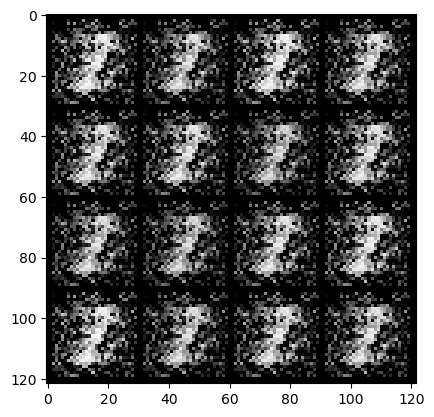

Training epoch 186/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7002212405204773, painter_err: 0.7055360078811646


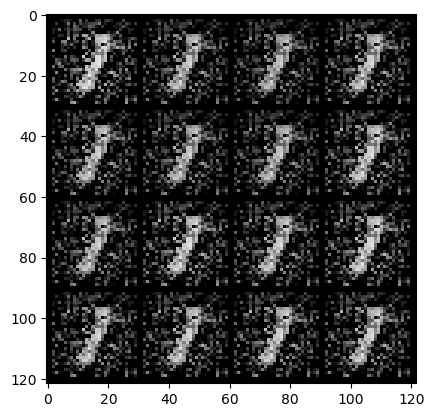

Training epoch 187/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6894009709358215, painter_err: 0.6968289017677307


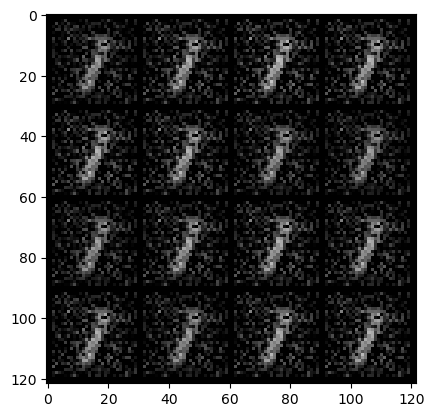

Training epoch 188/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6936156749725342, painter_err: 0.665158212184906


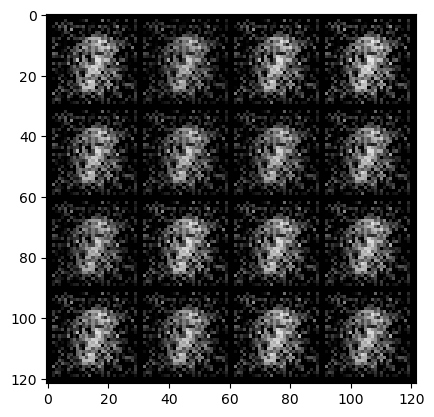

Training epoch 189/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6909930109977722, painter_err: 0.7276982665061951


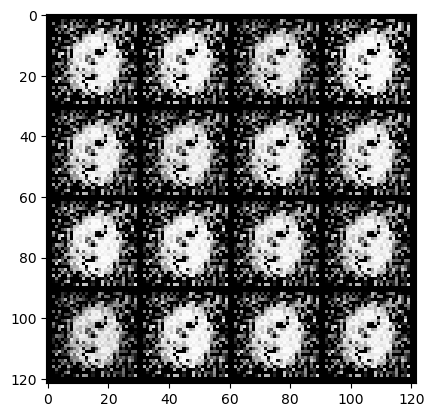

Training epoch 190/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7022666931152344, painter_err: 0.7303918600082397


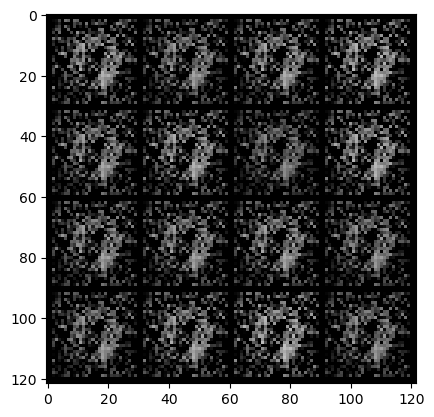

Training epoch 191/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6928989291191101, painter_err: 0.6927461624145508


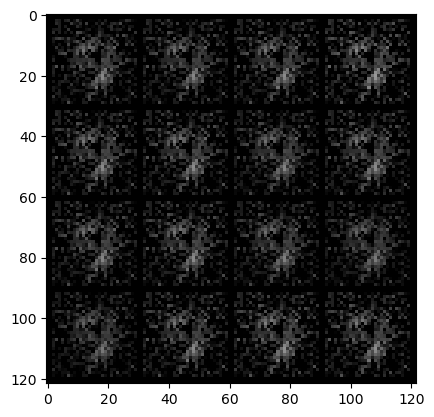

Training epoch 192/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7018784284591675, painter_err: 0.6478813886642456


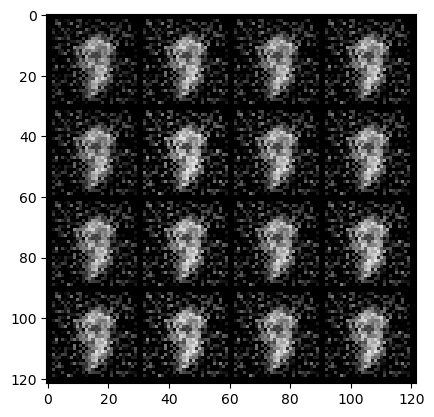

Training epoch 193/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.7026389837265015, painter_err: 0.6842965483665466


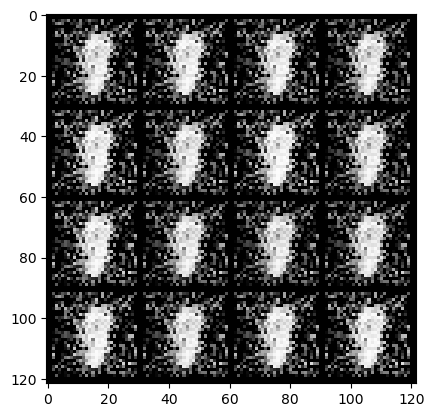

Training epoch 194/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6910498738288879, painter_err: 0.7422130703926086


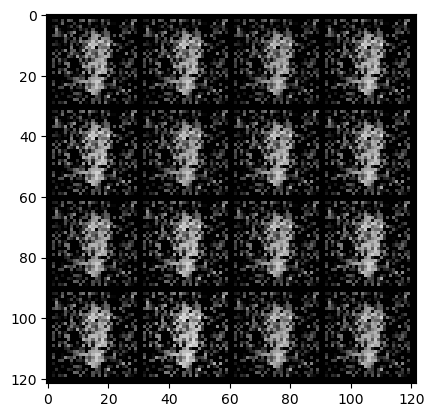

Training epoch 195/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6939861178398132, painter_err: 0.6954481601715088


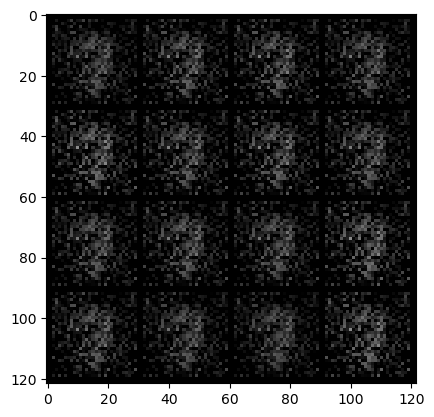

Training epoch 196/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6858307719230652, painter_err: 0.6765416264533997


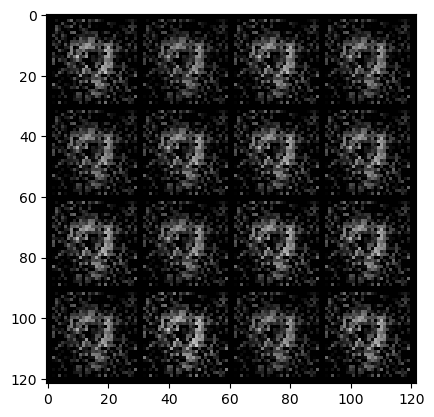

Training epoch 197/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6928783059120178, painter_err: 0.6565830111503601


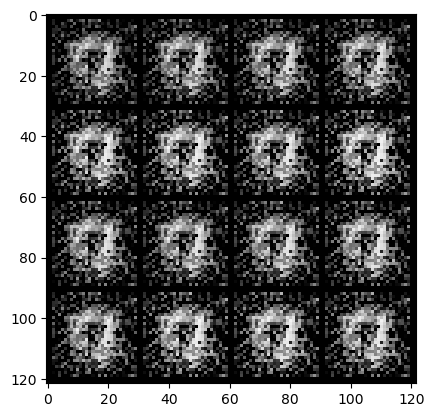

Training epoch 198/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6931333541870117, painter_err: 0.7346088290214539


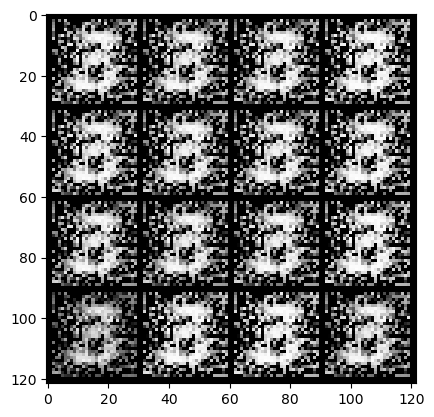

Training epoch 199/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.6932901740074158, painter_err: 0.7454290986061096


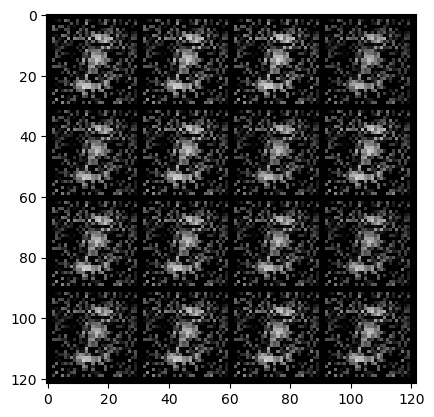

Training epoch 200/200


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


teacher_err: 0.691937267780304, painter_err: 0.6895872354507446


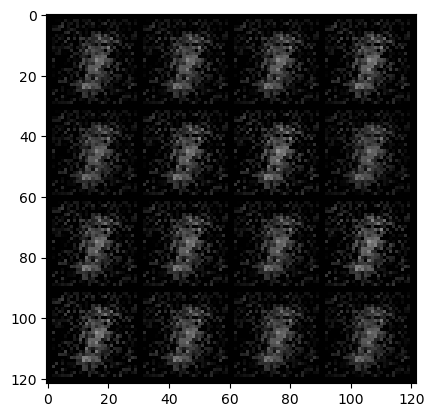

In [46]:
EPOCHS = 200
LATENT_DIM = 32
DROPOUT = 0.3

### RAZVAN
TEACHER_PRETRAIN_EPOCHS = 0
###

loss_teacher = th.nn.BCELoss()
loss_school = th.nn.BCELoss()

teacher_model = Teacher(input_shape=28*28, lst_layers=[512, 256], dropout=DROPOUT).cuda()
painter_model = Painter(input_shape=LATENT_DIM, lst_layers=[128, 256, 512,  512], output_shape=28*28).cuda()

teacher_optimizer = th.optim.Adam(teacher_model.parameters(), lr=1e-5)
painter_optimizer = th.optim.Adam(painter_model.parameters(), lr=5e-5)

for epoch in range(EPOCHS):
    print("Training epoch {}/{}".format(epoch + 1, EPOCHS))
    for th_x_teacher_good, in dl:
        
        th_y_teacher_good = th.ones(th_x_teacher_good.shape[0], 1).cuda()
        th_y_teacher_bad = th.zeros(th_x_teacher_good.shape[0], 1).cuda()
            
        th_x_painter = th.rand(th_x_teacher_good.shape[0], LATENT_DIM).cuda()
    
        th_x_teacher_bad = painter_model(th_x_painter).detach()
        
        th_x_teacher_full = th.cat([th_x_teacher_good, th_x_teacher_bad])
        th_y_teacher_full = th.cat([th_y_teacher_good, th_y_teacher_bad])
        
        th_y_hat_teacher = teacher_model(th_x_teacher_full)
        
        teacher_err = loss_teacher(th_y_hat_teacher, th_y_teacher_full)
        teacher_optimizer.zero_grad()
        teacher_err.backward()
        teacher_optimizer.step()
        
        if epoch <= TEACHER_PRETRAIN_EPOCHS:
            continue
        
        th_x_painter = th.rand(th_x_teacher_good.shape[0], LATENT_DIM).cuda()
        th_y_hat_painter = painter_model(th_x_painter)
        th_y_school = teacher_model(th_y_hat_painter)
        
        school_err = loss_school(th_y_school, th_y_teacher_good)
        painter_optimizer.zero_grad()
        school_err.backward()
        painter_optimizer.step()
    print("teacher_err: {}, painter_err: {}".format(teacher_err, school_err))
    #endfor th_x
    th_eval_gan(painter_model, latent_dim=LATENT_DIM)
    
        

# Tema

Alt script in care 
    pictor primeste (tema - int 0-9, random)
    profesor intoarce (0-10) - 10 inseamna junk